In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/mémoire/data/3_data_gis_num.xlsx')


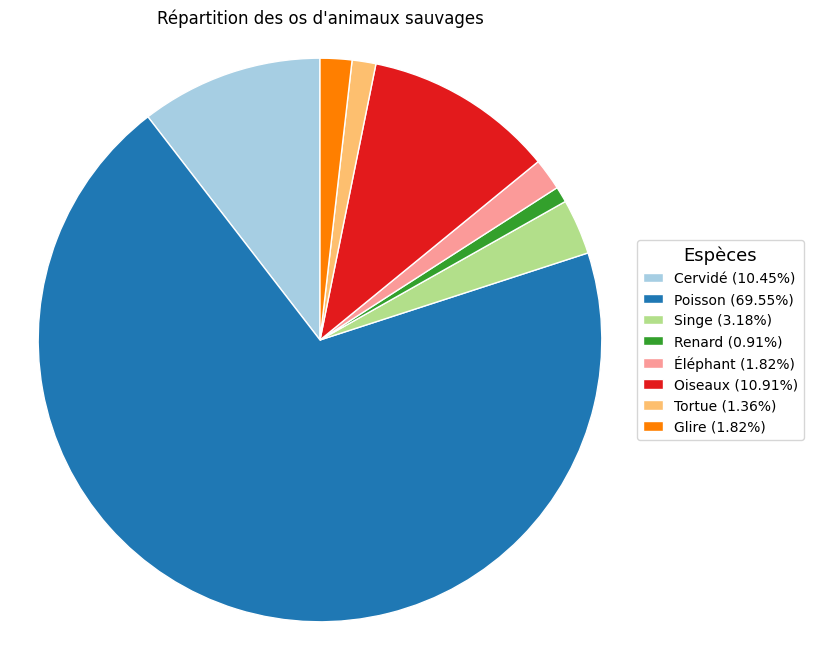

In [ ]:

# Données
animaux = ['Cervidé', 'Poisson', 'Singe', 'Renard', 'Éléphant', 'Oiseaux', 'Tortue', 'Glire']
quantites = [23, 153, 7, 2, 4, 24, 3, 4]

# Calcul des pourcentages
total = sum(quantites)
pourcentages = [f"{(q / total) * 100:.2f}%" for q in quantites]

# Création du camembert
plt.figure(figsize=(8, 8))
wedges, texts = plt.pie(quantites, startangle=90,
                         colors=plt.cm.Paired.colors,
                         wedgeprops=dict(edgecolor='white'),  # Bordures blanches pour les parts
                         labels=None)  # Pas d'étiquettes à l'intérieur

# Ajouter des légendes avec des traits pointant vers les parts et les pourcentages
labels_avec_pourcentage = [f"{animal} ({pourcentage})" for animal, pourcentage in zip(animaux, pourcentages)]
plt.legend(wedges, labels_avec_pourcentage, title="Espèces", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1),
           fontsize=10, title_fontsize='13', handlelength=1.5)

# Affichage du titre avec un espace
plt.title("Répartition des os d'animaux sauvages")
plt.axis('equal')  # Assure que le camembert soit circulaire
plt.show()







In [ ]:
# Supposons que ton DataFrame s'appelle df et contient les colonnes des animaux.
# Liste des colonnes d'animaux
animal_columns = [
    'bovin', 'chien', 'cheval', 'animal', 'ovin', 'poisson', 'porc',
    'oiseaux', 'cervide', 'volaille', 'singe', 'elephant',
    'tortue', 'glire', 'renard'
]

# Créer une colonne qui compte le nombre de colonnes non nulles (ou non vides) pour chaque ligne
df['non_empty_count'] = df[animal_columns].notna().sum(axis=1)

# Filtrer les lignes où une seule colonne est non nulle (ou non vide)
single_animal_rows = df[df['non_empty_count'] == 1]

# Calculer le pourcentage de ces lignes par rapport au nombre total de lignes
percentage_single_animal = (len(single_animal_rows) / len(df)) * 100

# Afficher le résultat
print(f"Pourcentage de lignes avec un seul animal présent : {percentage_single_animal:.2f}%")


Pourcentage de lignes avec un seul animal présent : 84.38%


In [ ]:
# Créer une colonne qui compte le nombre de colonnes non nulles (ou non vides) pour chaque ligne
df['non_empty_count'] = df[animal_columns].notna().sum(axis=1)

# Filtrer les lignes où plus d'une colonne est non nulle (ou non vide)
multiple_animals_rows = df[df['non_empty_count'] > 1]

# Supprimer la colonne 'non_empty_count' si elle n'est pas nécessaire dans le fichier exporté
multiple_animals_rows = multiple_animals_rows.drop(columns=['non_empty_count'])

# Enregistrer le DataFrame filtré dans un nouveau fichier Excel
multiple_animals_rows.to_excel('lignes_multiple_animaux.xlsx', index=False)


In [ ]:
# Charger le tableau avec les lignes où plus d'une colonne d'animal est remplie
df_multiple_animals = pd.read_excel('lignes_multiple_animaux.xlsx')

# Liste des colonnes d'animaux
animal_columns = [
    'bovin', 'chien', 'cheval', 'animal', 'ovin', 'poisson', 'porc',
    'oiseaux', 'cervide', 'volaille', 'singe', 'elephant',
    'tortue', 'glire', 'renard', 'lapin'
]

# Créer une nouvelle colonne qui liste les colonnes remplies pour chaque ligne
df_multiple_animals['colonnes_remplies'] = df_multiple_animals[animal_columns].apply(lambda row: ', '.join(row.index[row.notna()]), axis=1)

# Afficher les premières lignes pour vérifier le résultat
print(df_multiple_animals[['colonnes_remplies']])

# Si nécessaire, enregistrer le DataFrame mis à jour dans un nouveau fichier Excel
df_multiple_animals.to_excel('lignes_colonnes_remplies.xlsx', index=False)


                                     colonnes_remplies
0                                          chien, ovin
1                                        bovin, animal
2                  bovin, chien, cheval, porc, cervide
3                                    bovin, ovin, porc
4    bovin, chien, cheval, ovin, singe, elephant, g...
..                                                 ...
203                               bovin, chien, animal
204                                        chien, ovin
205                                 bovin, chien, ovin
206                                       bovin, chien
207                                      chien, animal

[208 rows x 1 columns]


In [ ]:

# Extraire les colonnes "1_nb" et "2_nb" et les combiner
combined = pd.concat([df['animal'], df['chien'],df['bovin'], df['ovin'],df['cheval'], df['porc'],df['volaille'], df['cervide'],df['poisson'], df['singe'],df['renard'], df['lapin'], df['elephant'], df['oiseaux'], df['tortue'], df['glire']])

# 1. Enlever les valeurs nulles
combined = combined.dropna()

# 2. Convertir les valeurs en numérique et ignorer les erreurs
combined = pd.to_numeric(combined, errors='coerce')

# 3. Enlever les valeurs qui ne peuvent pas être converties (seront NaN)
combined = combined.dropna()

# Calculer les statistiques pour les valeurs combinées
min_value = combined.min()
max_value = combined.max()
mean_value = combined.mean()
median_value = combined.median()
mode_value = combined.mode()[0]
std_dev = combined.std()
range_value = combined.max() - combined.min()

# Afficher les résultats
print("Statistiques pour les colonnes '1_nb' et '2_nb' combinées (après nettoyage) :")
print(f"Minimum: {min_value}")
print(f"Maximum: {max_value}")
print(f"Moyenne: {mean_value}")
print(f"Médiane: {median_value}")
print(f"Mode: {mode_value}")
print(f"Écart-type: {std_dev}")
print(f"Étendue: {range_value}")


Statistiques pour les colonnes '1_nb' et '2_nb' combinées (après nettoyage) :
Minimum: 1.0
Maximum: 3600.0
Moyenne: 3.8610062893081762
Médiane: 1.0
Mode: 1.0
Écart-type: 90.30049228257691
Étendue: 3599.0


In [ ]:
# Supprimer les valeurs minimales et maximales
min_value = combined.min()
max_value = combined.max()
combined_filtered = combined[(combined != min_value) & (combined != max_value)]

# Calculer les statistiques pour les valeurs combinées sans les valeurs minimales et maximales
min_value2 = combined_filtered.min()
max_value2 = combined_filtered.max()
mean_value = combined_filtered.mean()
median_value = combined_filtered.median()
mode_value = combined_filtered.mode()[0] if not combined_filtered.mode().empty else float('nan')
std_dev = combined_filtered.std()
range_value = combined_filtered.max() - combined_filtered.min()

# Afficher les résultats
print(f"Minimum: {min_value2}")
print(f"Maximum: {max_value2}")
print(f"Moyenne: {mean_value}")
print(f"Médiane: {median_value}")
print(f"Mode: {mode_value}")
print(f"Écart-type: {std_dev}")
print(f"Étendue: {range_value}")

Minimum: 2.0
Maximum: 100.0
Moyenne: 3.9411764705882355
Médiane: 2.0
Mode: 2.0
Écart-type: 6.689632832337986
Étendue: 98.0


In [ ]:
# Définir les valeurs de substitution pour "plusieurs" et "peu"
substitutions = {
    "plusieurs": 10,
    "peu": 3
}

# Fonction pour remplacer les mots par des valeurs numériques
def remplacer_mots(val):
    if isinstance(val, str):
        return substitutions.get(val.lower(), val)  # remplace par la valeur définie ou garde l'original si non trouvé
    return val

# Appliquer la fonction de remplacement à tout le DataFrame
df = df.applymap(remplacer_mots)

# Enregistrer le nouveau fichier Excel
df.to_excel('/content/drive/MyDrive/mémoire/data/1_data_fr_doublon.xlsx', index=False)

print("Les valeurs ont été remplacées et le fichier a été enregistré sous le nom 'nouveau_fichier.xlsx'.")


Les valeurs ont été remplacées et le fichier a été enregistré sous le nom 'nouveau_fichier.xlsx'.


In [ ]:
df

,periode,site,"xcoord,N,24,15","ycoord,N,24,15",structure_num,proprétaire,structure_type,animal,animal_emp,animal_part,...,lapin_emp,lapin_part,elephant,elephant_emp,elephant_part,oiseaux,oiseaux_part,tortue,glire,total
0,NaN,Yinxu_ouest,1.272587e+07,4.317473e+06,殷墟B57,NaN,NaN,1.0,NaN,entier,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,NaN,Yinxu_ouest,1.272587e+07,4.317473e+06,殷墟B69,NaN,NaN,10.0,NaN,articulation,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
2,1.5,Sanjiazhuang,1.272610e+07,4.320090e+06,80三家庄M1,NaN,tombe,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
3,1.5,Sanjiazhuang,1.272610e+07,4.320090e+06,80三家庄M2,NaN,tombe,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,1.5,Sanjiazhuang,1.272610e+07,4.320090e+06,80三家庄M3,NaN,tombe,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,NaN,Guojiawan,1.272776e+07,4.316544e+06,2000M,NaN,tombe,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1299,NaN,Guojiawan,1.272776e+07,4.316544e+06,2000M73,NaN,tombe,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1300,4.0,Guozhuang,1.272400e+07,4.314955e+06,86郭庄北M6,NaN,tombe,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
1301,2.0,Tiesanlu,1.272709e+07,4.314661e+06,2006ATSM89,moyenne_noblesse,tombe,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


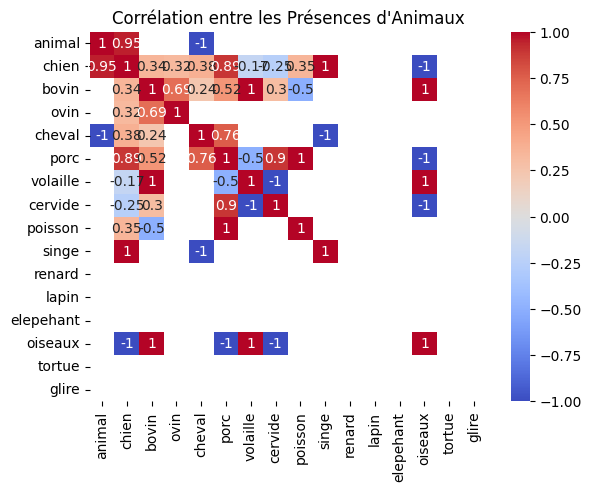

In [ ]:
animal_columns = ['animal', 'chien', 'bovin', 'ovin', 'cheval', 'porc', 'volaille', 'cervide', 'poisson', 'singe', 'renard', 'elepehant', 'oiseaux',  'tortue', 'glire']
animal_data = df[animal_columns]

sns.heatmap(animal_data.corr(), annot=True, cmap='coolwarm')
plt.title('Corrélation entre les Présences d\'Animaux')
plt.show()


             animal     chien     bovin      ovin    cheval      porc  \
animal     1.000000  0.110888 -0.004628 -0.033620  0.158173  0.025710   
chien      0.110888  1.000000 -0.023596 -0.013491  0.044804  0.108821   
bovin     -0.004628 -0.023596  1.000000 -0.006172 -0.003634  0.000024   
ovin      -0.033620 -0.013491 -0.006172  1.000000  0.002430 -0.004920   
cheval     0.158173  0.044804 -0.003634  0.002430  1.000000  0.201965   
porc       0.025710  0.108821  0.000024 -0.004920  0.201965  1.000000   
volaille  -0.009038  0.002726  0.001326  0.007585 -0.010212  0.068619   
cervide    0.042310  0.044062  0.001421 -0.013891  0.022523  0.137669   
poisson   -0.005548  0.063690 -0.001163 -0.006989 -0.007418 -0.000168   
singe      0.423740  0.283665 -0.001445  0.002717  0.439513  0.028332   
renard    -0.006198 -0.017209 -0.000771  0.031529  0.433109 -0.004121   
lapin     -0.004381 -0.023574 -0.000823 -0.006957 -0.004950 -0.002913   
elepehant -0.008772 -0.035779 -0.001370  0.015346  

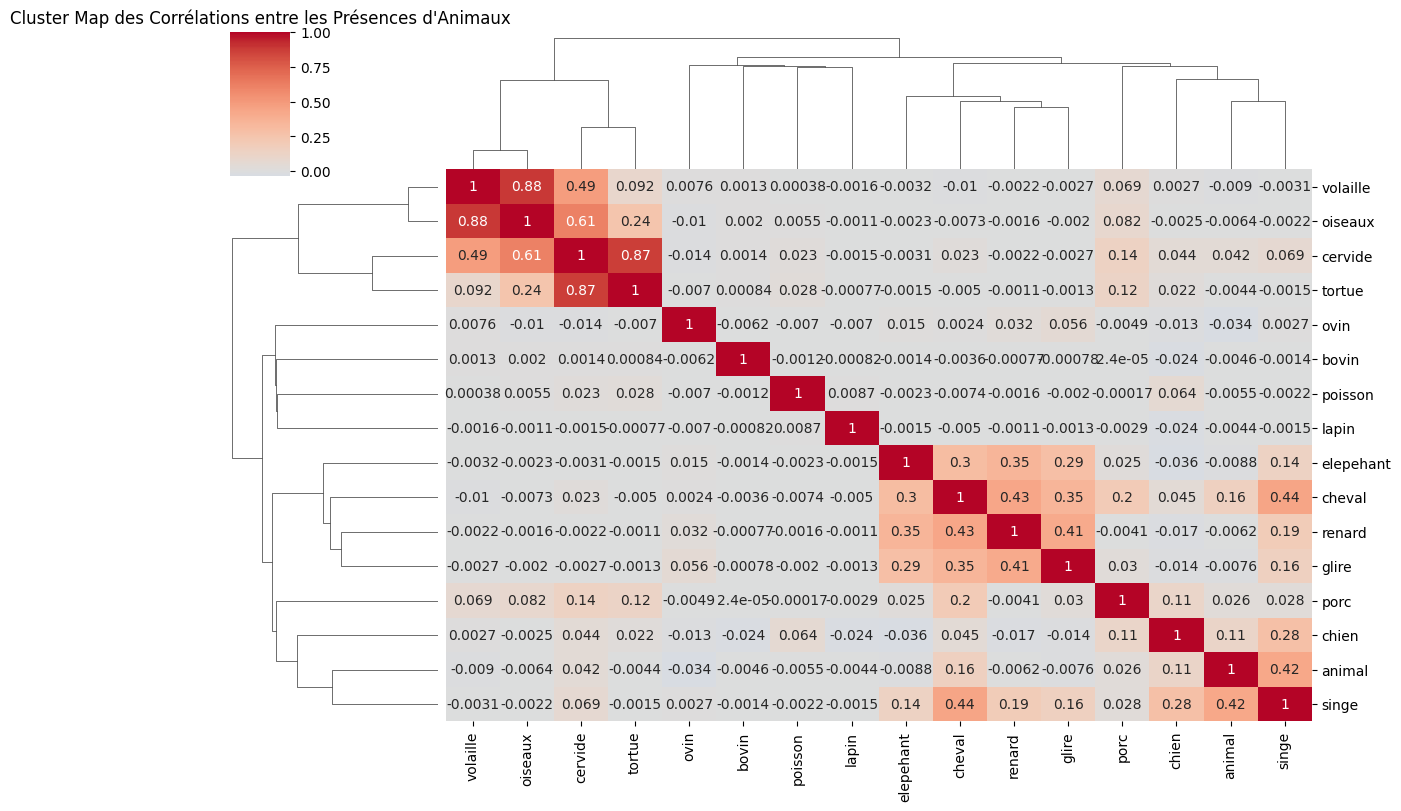

In [ ]:
# Sélectionner les colonnes représentant les animaux
animal_columns = ['animal', 'chien', 'bovin', 'ovin', 'cheval', 'porc', 'volaille', 'cervide', 'poisson', 'singe', 'renard', 'lapin', 'elepehant', 'oiseaux',  'tortue', 'glire']
animal_data = df[animal_columns]

# Remplacer les valeurs non numériques par 0 ou NA si nécessaire
animal_data = animal_data.apply(pd.to_numeric, errors='coerce').fillna(0)

# Calculer la matrice de corrélation
correlation_matrix = animal_data.corr()

# Remplacer les valeurs infinies ou NaN par 0
correlation_matrix = correlation_matrix.replace([np.inf, -np.inf], np.nan).fillna(0)

# Vérifier la matrice de corrélation pour toute valeur infinie ou NaN
print(correlation_matrix)

# Créer la cluster map
sns.clustermap(correlation_matrix, annot=True, cmap='coolwarm', center=0, figsize=(12, 8))
plt.title('Cluster Map des Corrélations entre les Présences d\'Animaux')
plt.show()

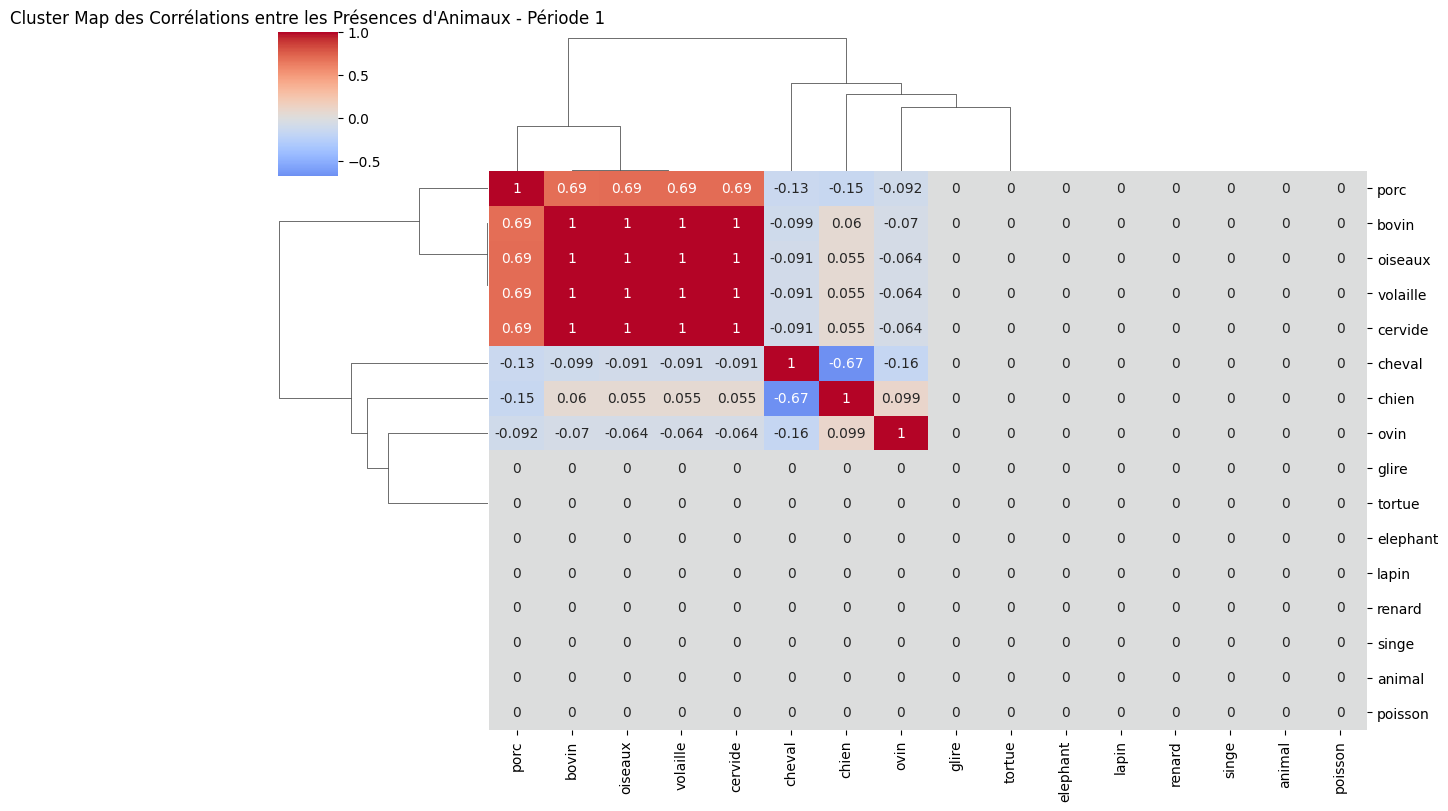

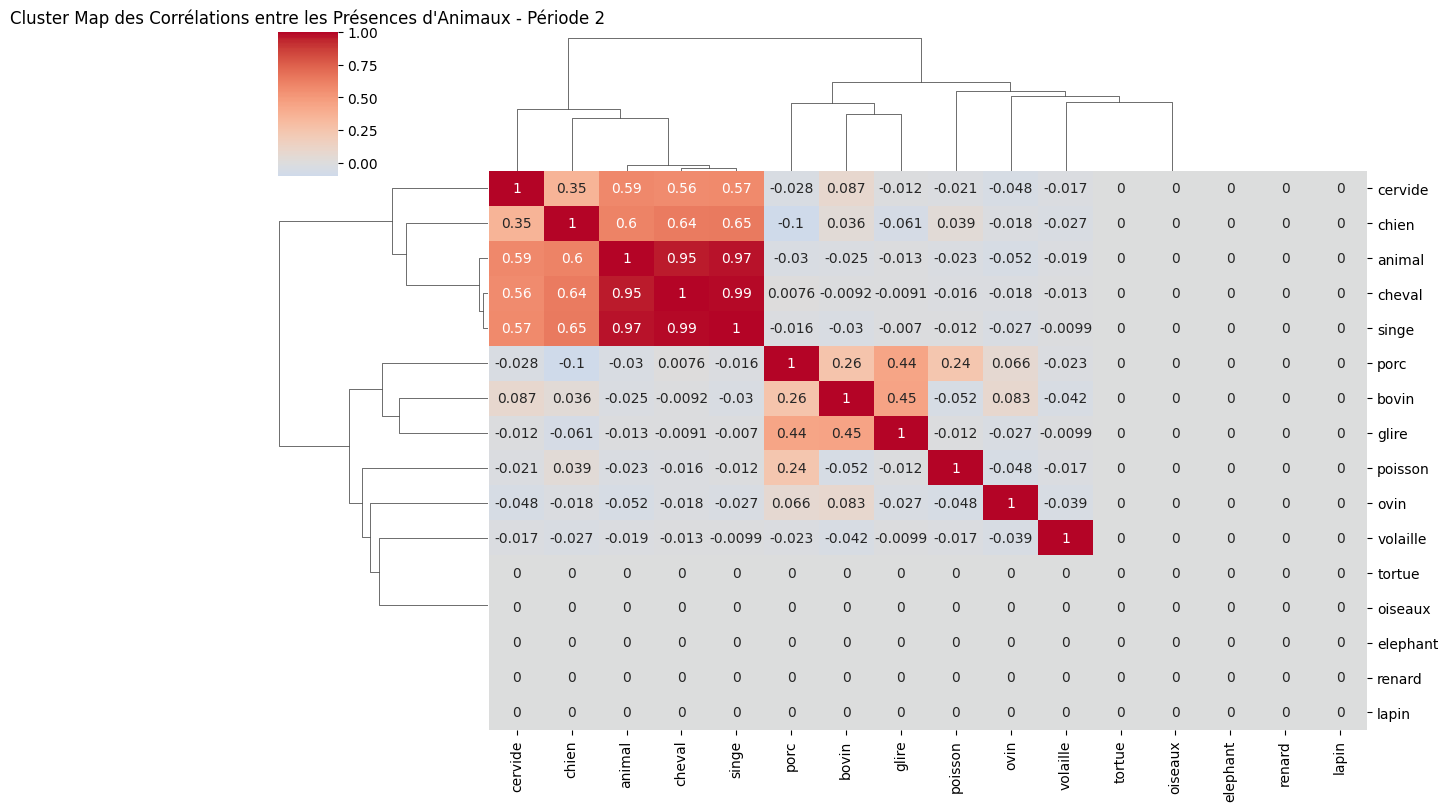

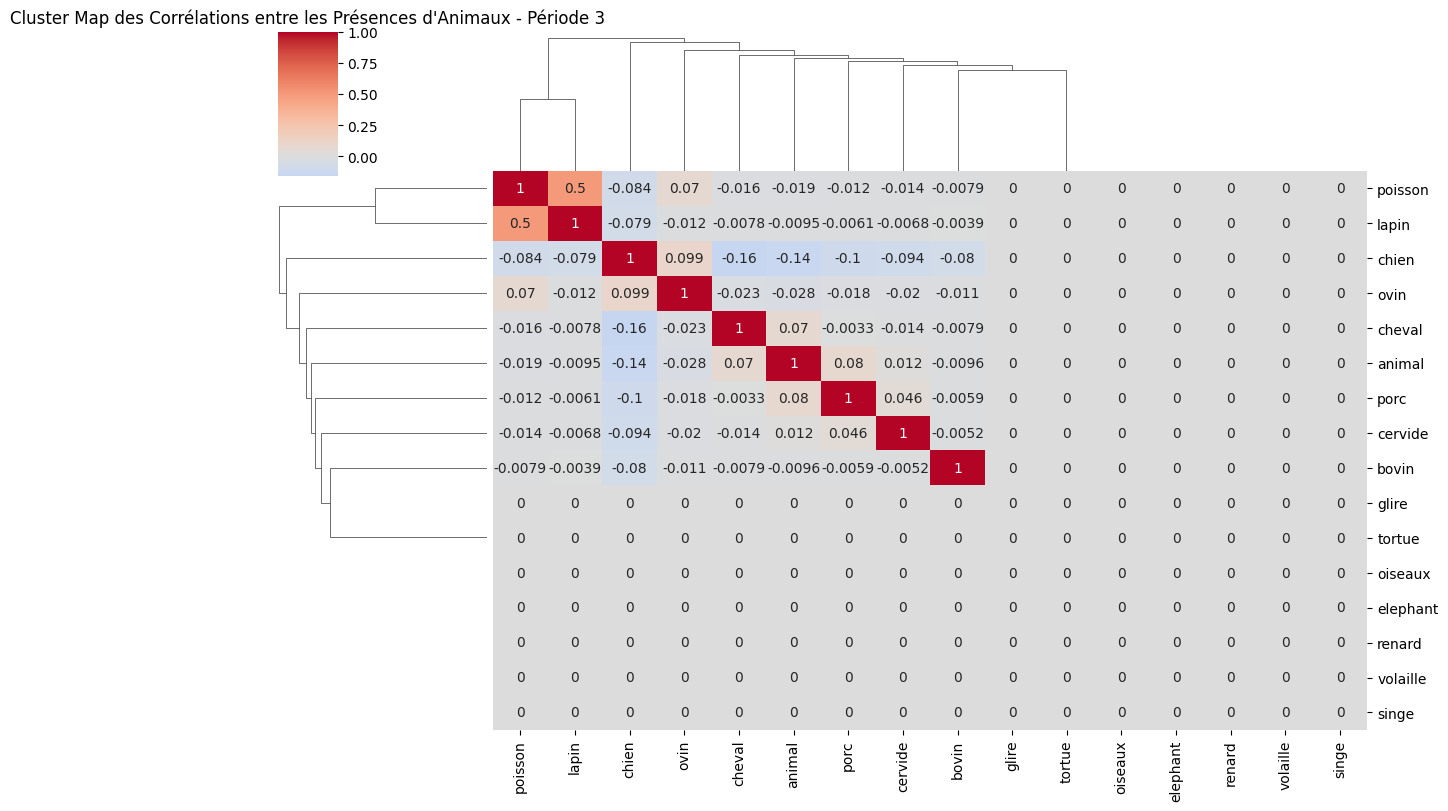

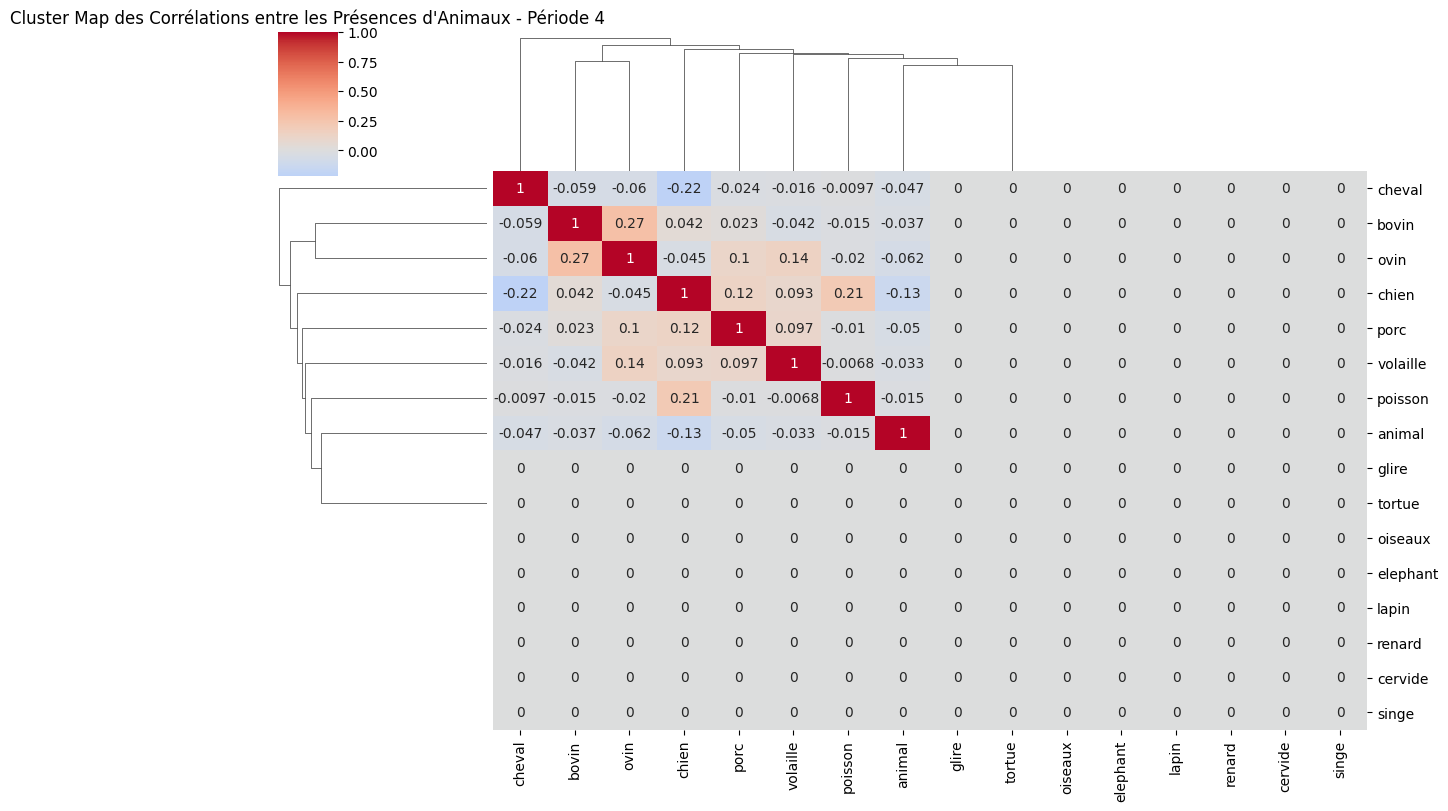

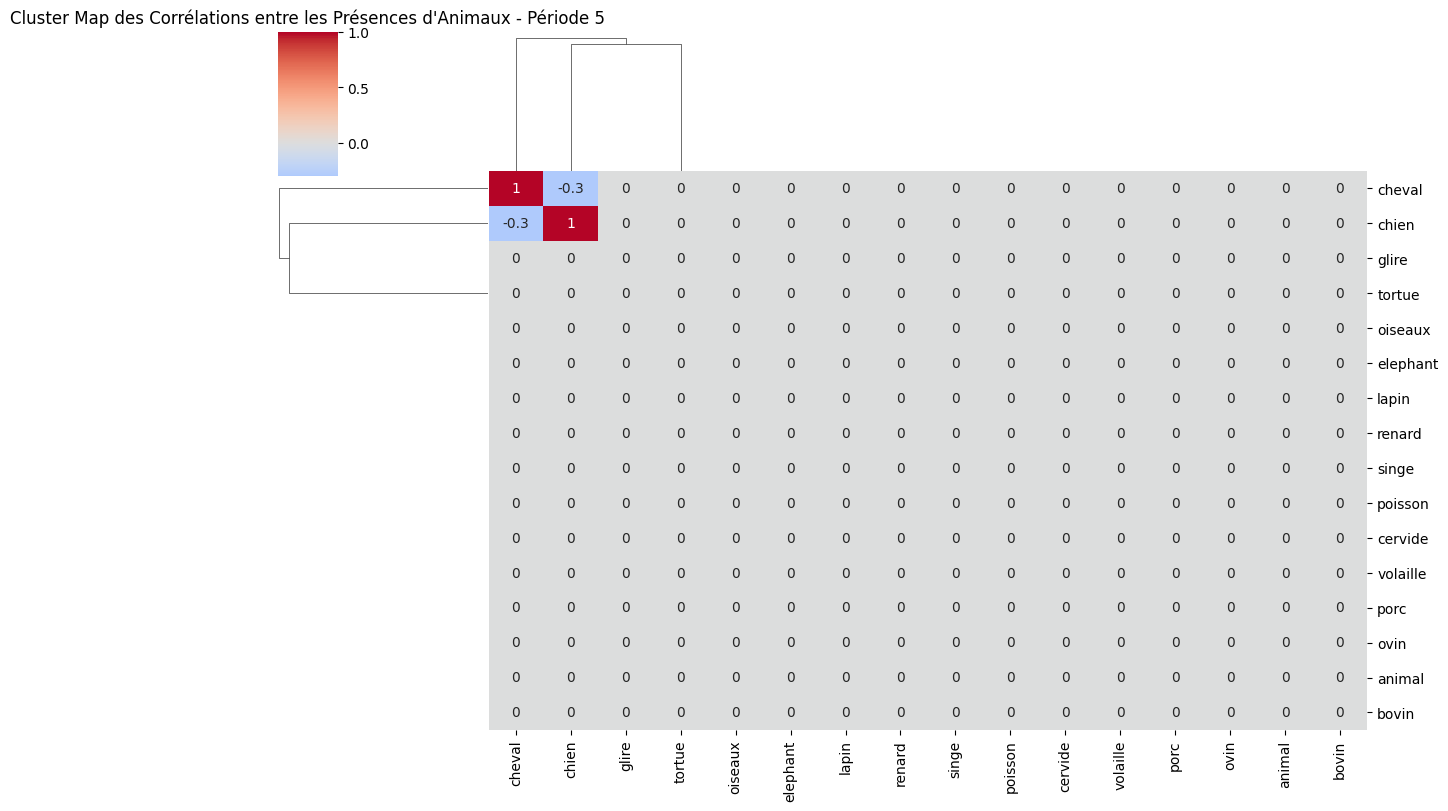

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assurez-vous d'avoir importé les bibliothèques nécessaires et d'avoir chargé votre DataFrame

# Sélectionner les colonnes représentant les animaux
animal_columns = [
    'animal', 'chien', 'bovin', 'ovin', 'cheval', 'porc', 'volaille',
    'cervide', 'poisson', 'singe', 'renard', 'lapin', 'elephant',
    'oiseaux',  'tortue', 'glire'
]

# Remplacer les valeurs non numériques par 0 ou NA si nécessaire
df[animal_columns] = df[animal_columns].apply(pd.to_numeric, errors='coerce').fillna(0)

# Définir les groupes de périodes
period_groups = {
    'Période 1': [1, 1.5],
    'Période 2': [2, 2.5],
    'Période 3': [3, 3.5],
    'Période 4': [4, 4.5],
    'Période 5': [5]
}

# Créer des cluster maps pour chaque groupe de périodes
for group_name, periods in period_groups.items():
    # Filtrer les données pour les périodes actuelles
    group_data = df[df['periode'].isin(periods)][animal_columns]

    # Calculer la matrice de corrélation pour le groupe de périodes
    correlation_matrix = group_data.corr()

    # Remplacer les valeurs infinies ou NaN par 0
    correlation_matrix = correlation_matrix.replace([np.inf, -np.inf], np.nan).fillna(0)

    # Créer et afficher la cluster map pour le groupe de périodes
    sns.clustermap(correlation_matrix, annot=True, cmap='coolwarm', center=0, figsize=(12, 8))
    plt.title(f'Cluster Map des Corrélations entre les Présences d\'Animaux - {group_name}')
    plt.show()



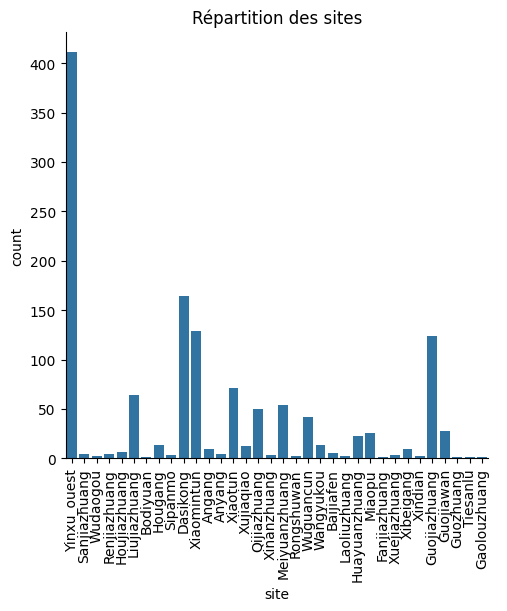

In [ ]:
sns.catplot(data=df, x='site', kind='count')
plt.title('Répartition des sites')
plt.xticks(rotation=90)

plt.show()


In [ ]:
animal_sums = animal_data.sum()

# Calculer la somme totale
total_sum = animal_sums.sum()

# Calculer les proportions
animal_proportions = animal_sums / total_sum

# Trier les proportions par ordre décroissant
animal_proportions_sorted = animal_proportions.sort_values(ascending=False)

# Afficher les proportions triées en ordre décroissant
print("Proportions triées par ordre décroissant :")
print(animal_proportions_sorted)

# Calculer les proportions en pourcentage
animal_proportions_percent = (animal_proportions / total_sum) * 100

# Trier les proportions en pourcentage par ordre décroissant
animal_proportions_percent_sorted = animal_proportions_percent.sort_values(ascending=False)

# Afficher les proportions en pourcentage triées par ordre décroissant
print("\nProportions en pourcentage triées par ordre décroissant :")
print(animal_proportions_percent_sorted.round(2))

Proportions triées par ordre décroissant :
bovin        0.628441
chien        0.219254
cheval       0.050660
animal       0.026877
ovin         0.025248
poisson      0.024923
porc         0.010099
oiseaux      0.003909
cervide      0.003747
volaille     0.003584
singe        0.001140
elepehant    0.000652
tortue       0.000489
glire        0.000489
renard       0.000326
lapin        0.000163
dtype: float64

Proportions en pourcentage triées par ordre décroissant :
bovin        0.01
chien        0.00
cheval       0.00
animal       0.00
ovin         0.00
poisson      0.00
porc         0.00
oiseaux      0.00
cervide      0.00
volaille     0.00
singe        0.00
elepehant    0.00
tortue       0.00
glire        0.00
renard       0.00
lapin        0.00
dtype: float64


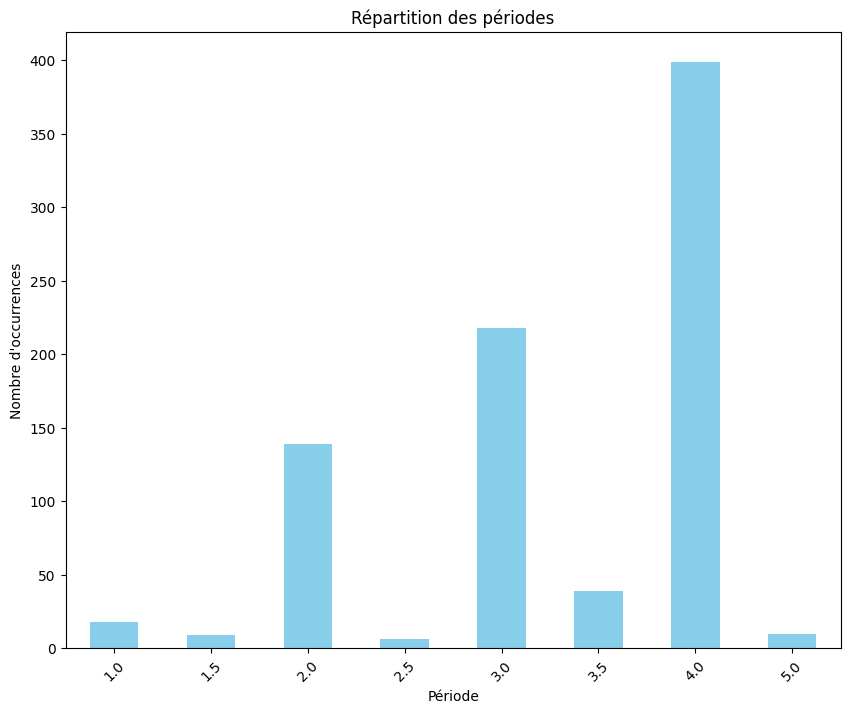

In [ ]:
# Sélectionner la colonne 'periode'
period_data = df['periode']

# Calculer la distribution des périodes
period_counts = period_data.value_counts()

# Trier les périodes par ordre croissant
period_counts = period_counts.sort_index()

# Créer un graphique à barres
plt.figure(figsize=(10, 8))
period_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Période')
plt.ylabel('Nombre d\'occurrences')
plt.title('Répartition des périodes')
plt.xticks(rotation=45)  # Faire pivoter les étiquettes de l'axe x pour une meilleure lisibilité
plt.show()

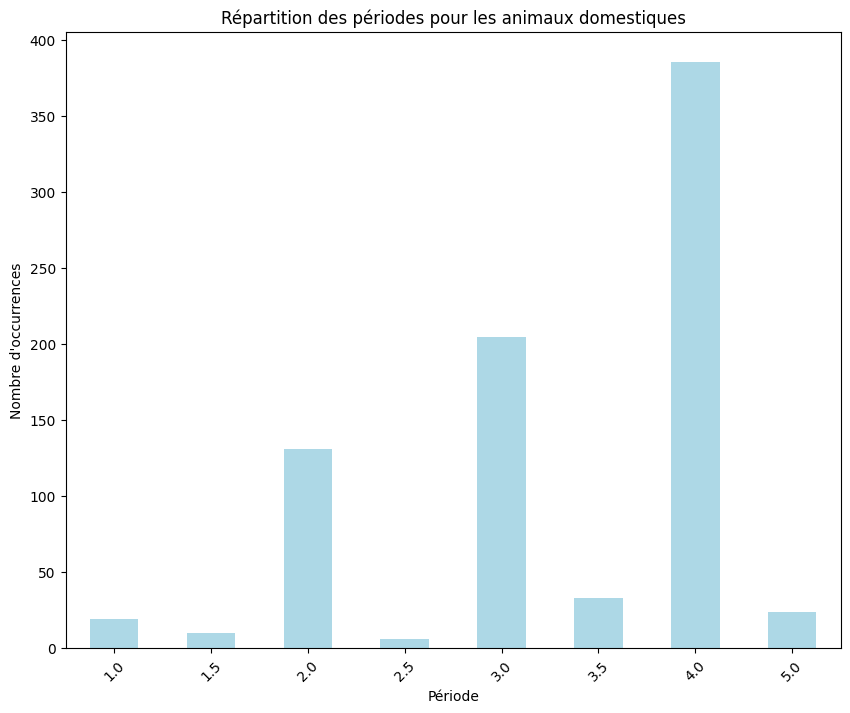

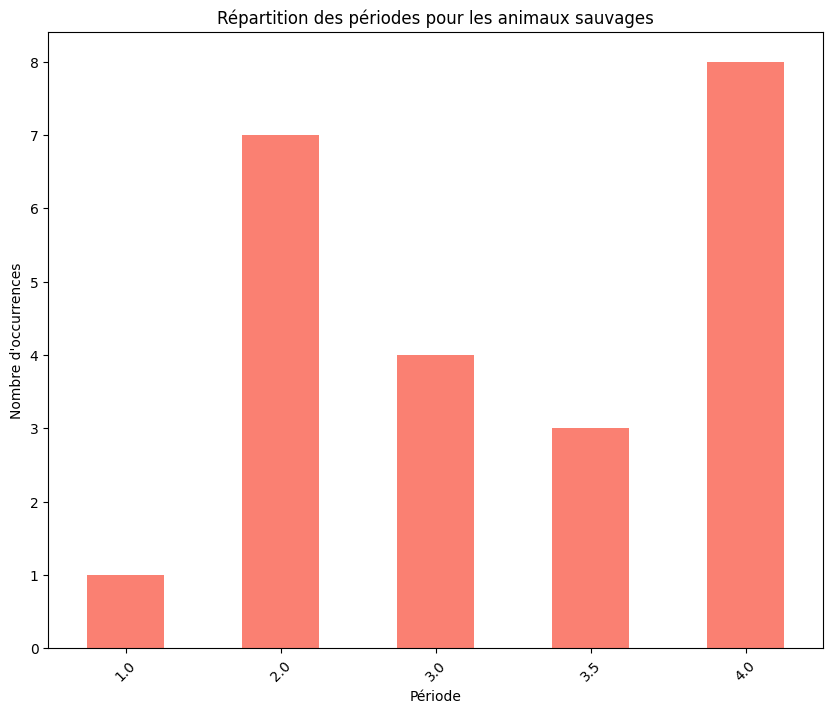

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Sélectionner la colonne 'periode'
period_data = df['periode']

# Créer des colonnes pour les animaux domestiques et sauvages
domestic_animals = ['bovin', 'chien', 'cheval', 'ovin', 'porc', 'volaille']
wild_animals = ['oiseaux', 'cervide', 'singe', 'elephant', 'tortue', 'glire', 'renard', 'lapin', 'poisson']

# Calculer la distribution des périodes pour les animaux domestiques
domestic_counts = df[df[domestic_animals].sum(axis=1) > 0].groupby('periode').size()

# Calculer la distribution des périodes pour les animaux sauvages
wild_counts = df[df[wild_animals].sum(axis=1) > 0].groupby('periode').size()

# Trier les périodes par ordre croissant
domestic_counts = domestic_counts.sort_index()
wild_counts = wild_counts.sort_index()

# Créer le premier graphique pour les animaux domestiques
plt.figure(figsize=(10, 8))
domestic_counts.plot(kind='bar', color='lightblue')
plt.xlabel('Période')
plt.ylabel('Nombre d\'occurrences')
plt.title('Répartition des périodes pour les animaux domestiques')
plt.xticks(rotation=45)  # Faire pivoter les étiquettes de l'axe x pour une meilleure lisibilité
plt.show()

# Créer le deuxième graphique pour les animaux sauvages
plt.figure(figsize=(10, 8))
wild_counts.plot(kind='bar', color='salmon')
plt.xlabel('Période')
plt.ylabel('Nombre d\'occurrences')
plt.title('Répartition des périodes pour les animaux sauvages')
plt.xticks(rotation=45)  # Faire pivoter les étiquettes de l'axe x pour une meilleure lisibilité
plt.show()



In [ ]:
# Sélectionner les colonnes à inclure dans df2
columns_to_select = [
    'periode', 'site', 'proprétaire', 'structure_type',
    'animal','chien', 'bovin', 'ovin', 'cheval', 'porc', 'volaille', 'cervide', 'poisson'
]

# Créer le DataFrame filtré
df2 = df[columns_to_select]


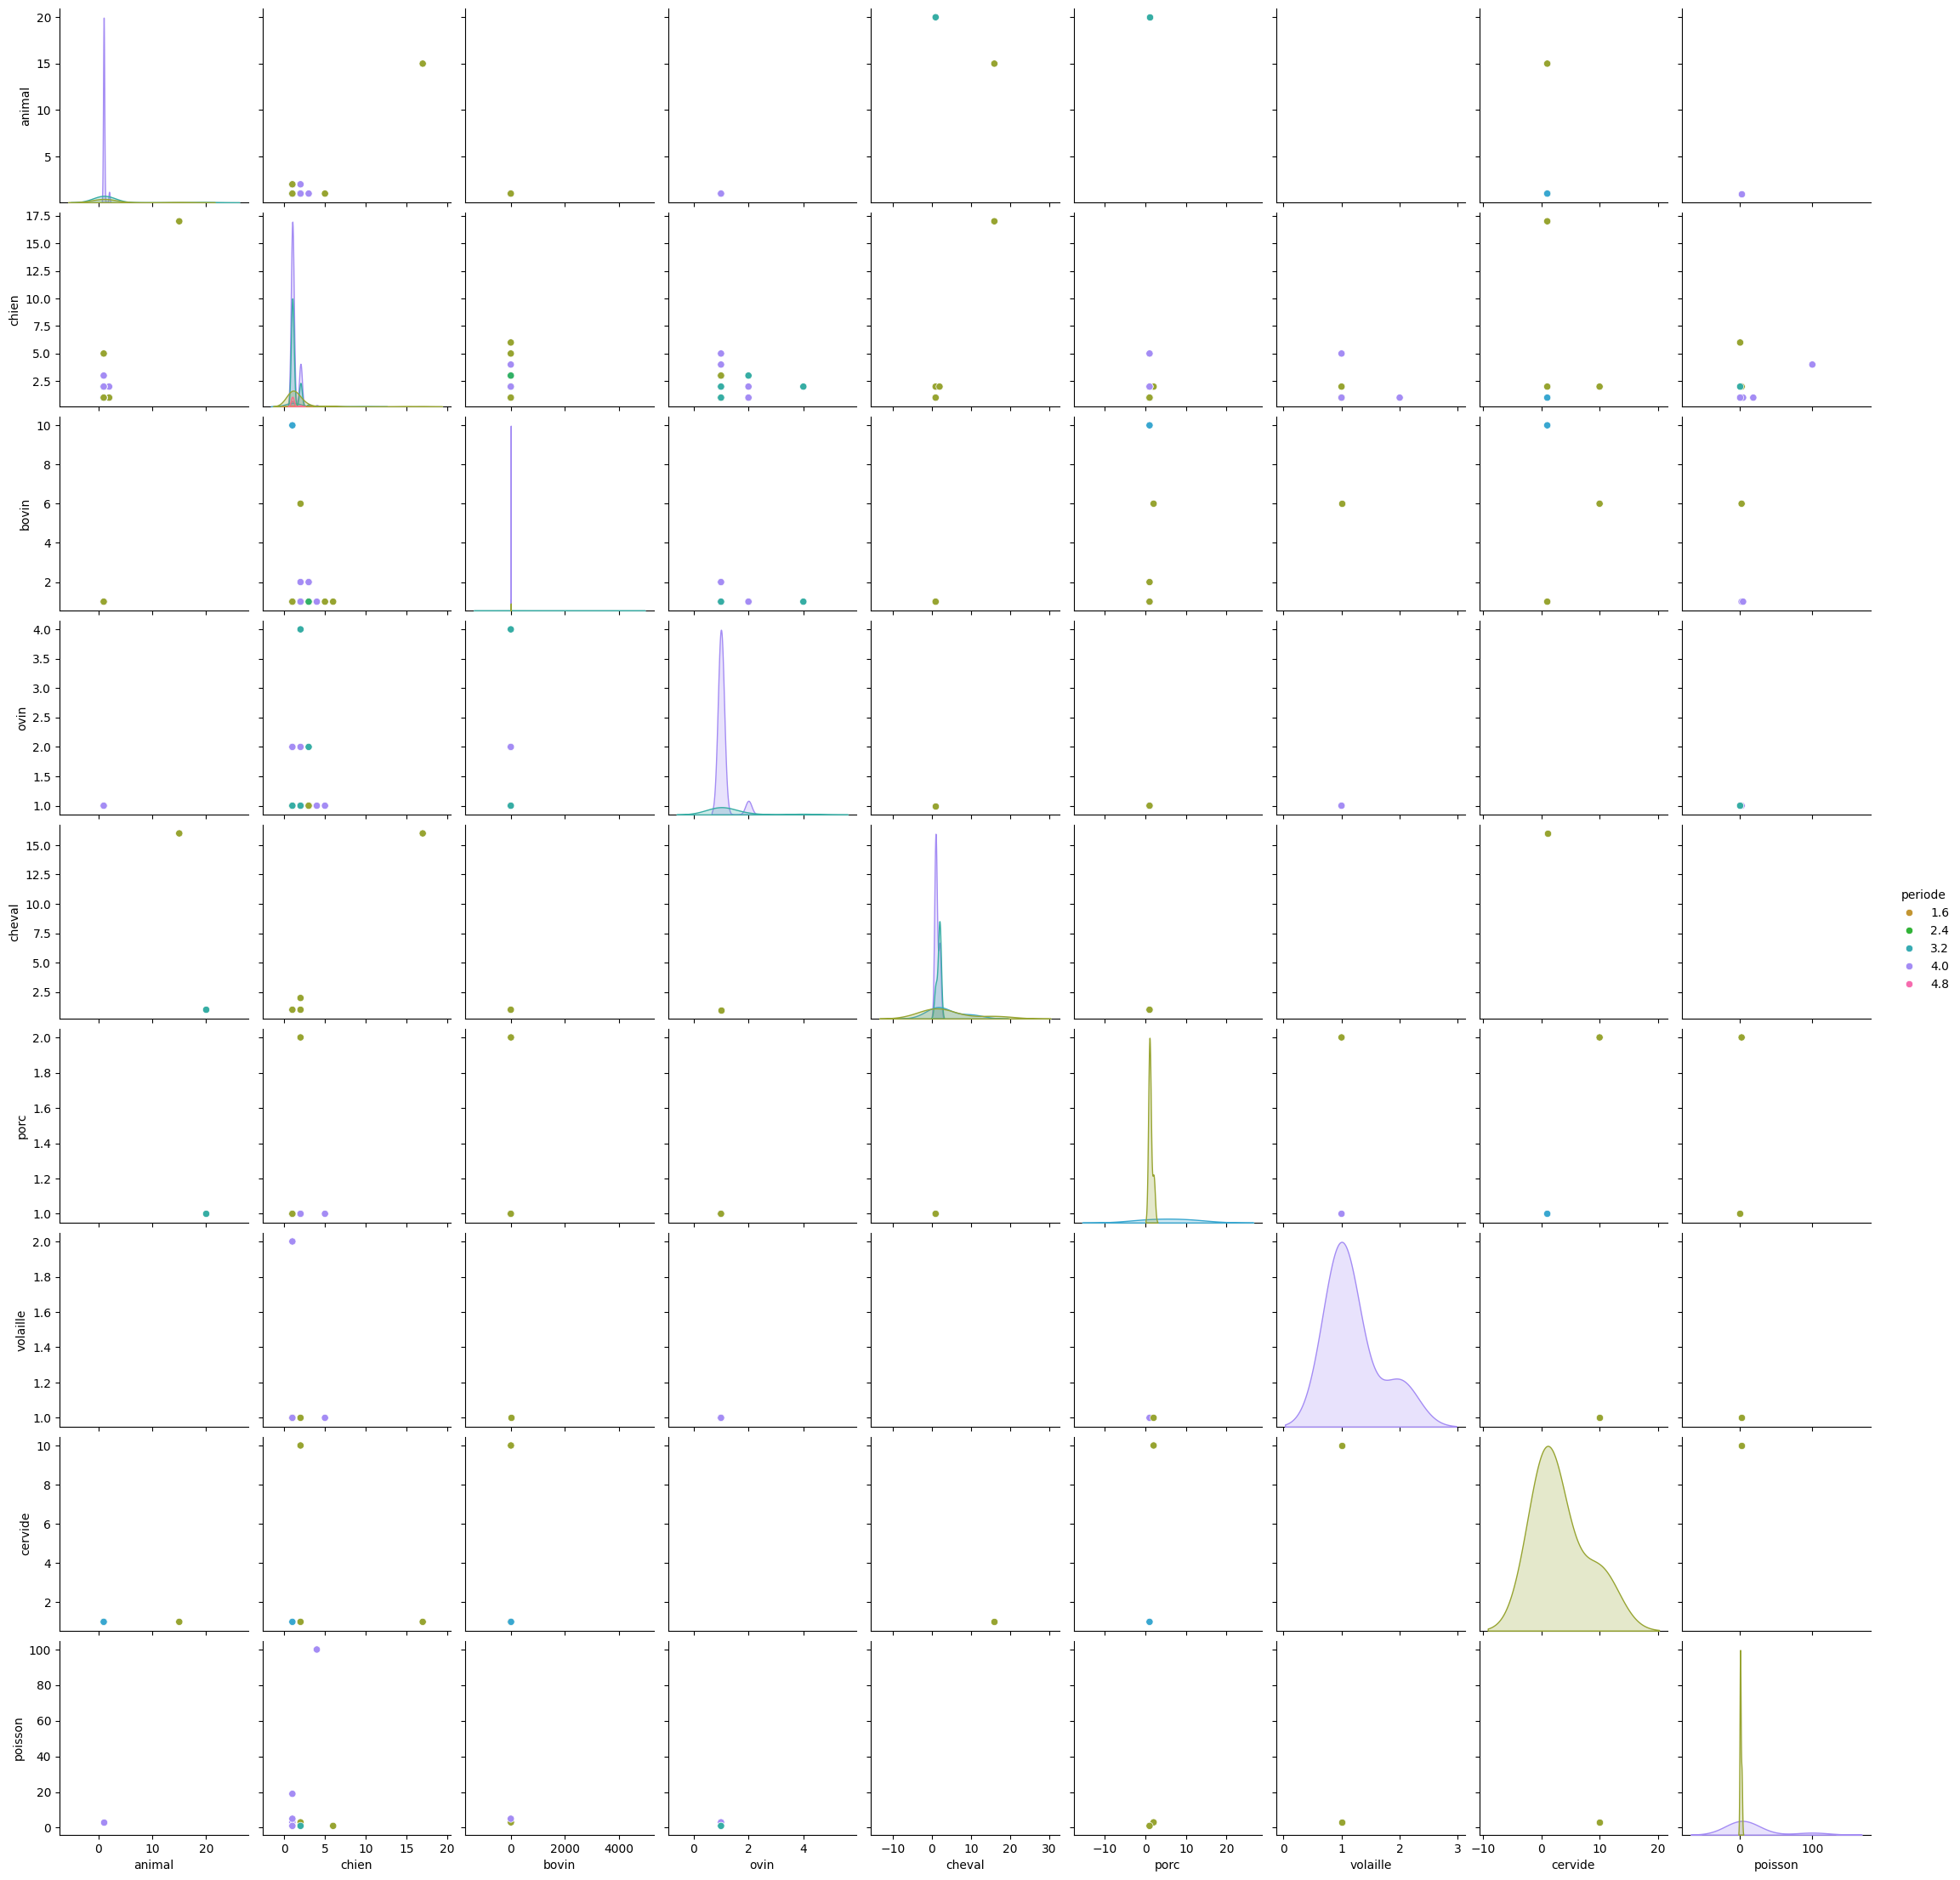

In [ ]:
sns.pairplot(data = df2, hue ='periode', palette='husl')
plt.show()

In [ ]:
df3 = df2[(df2['bovin'] < 20)]

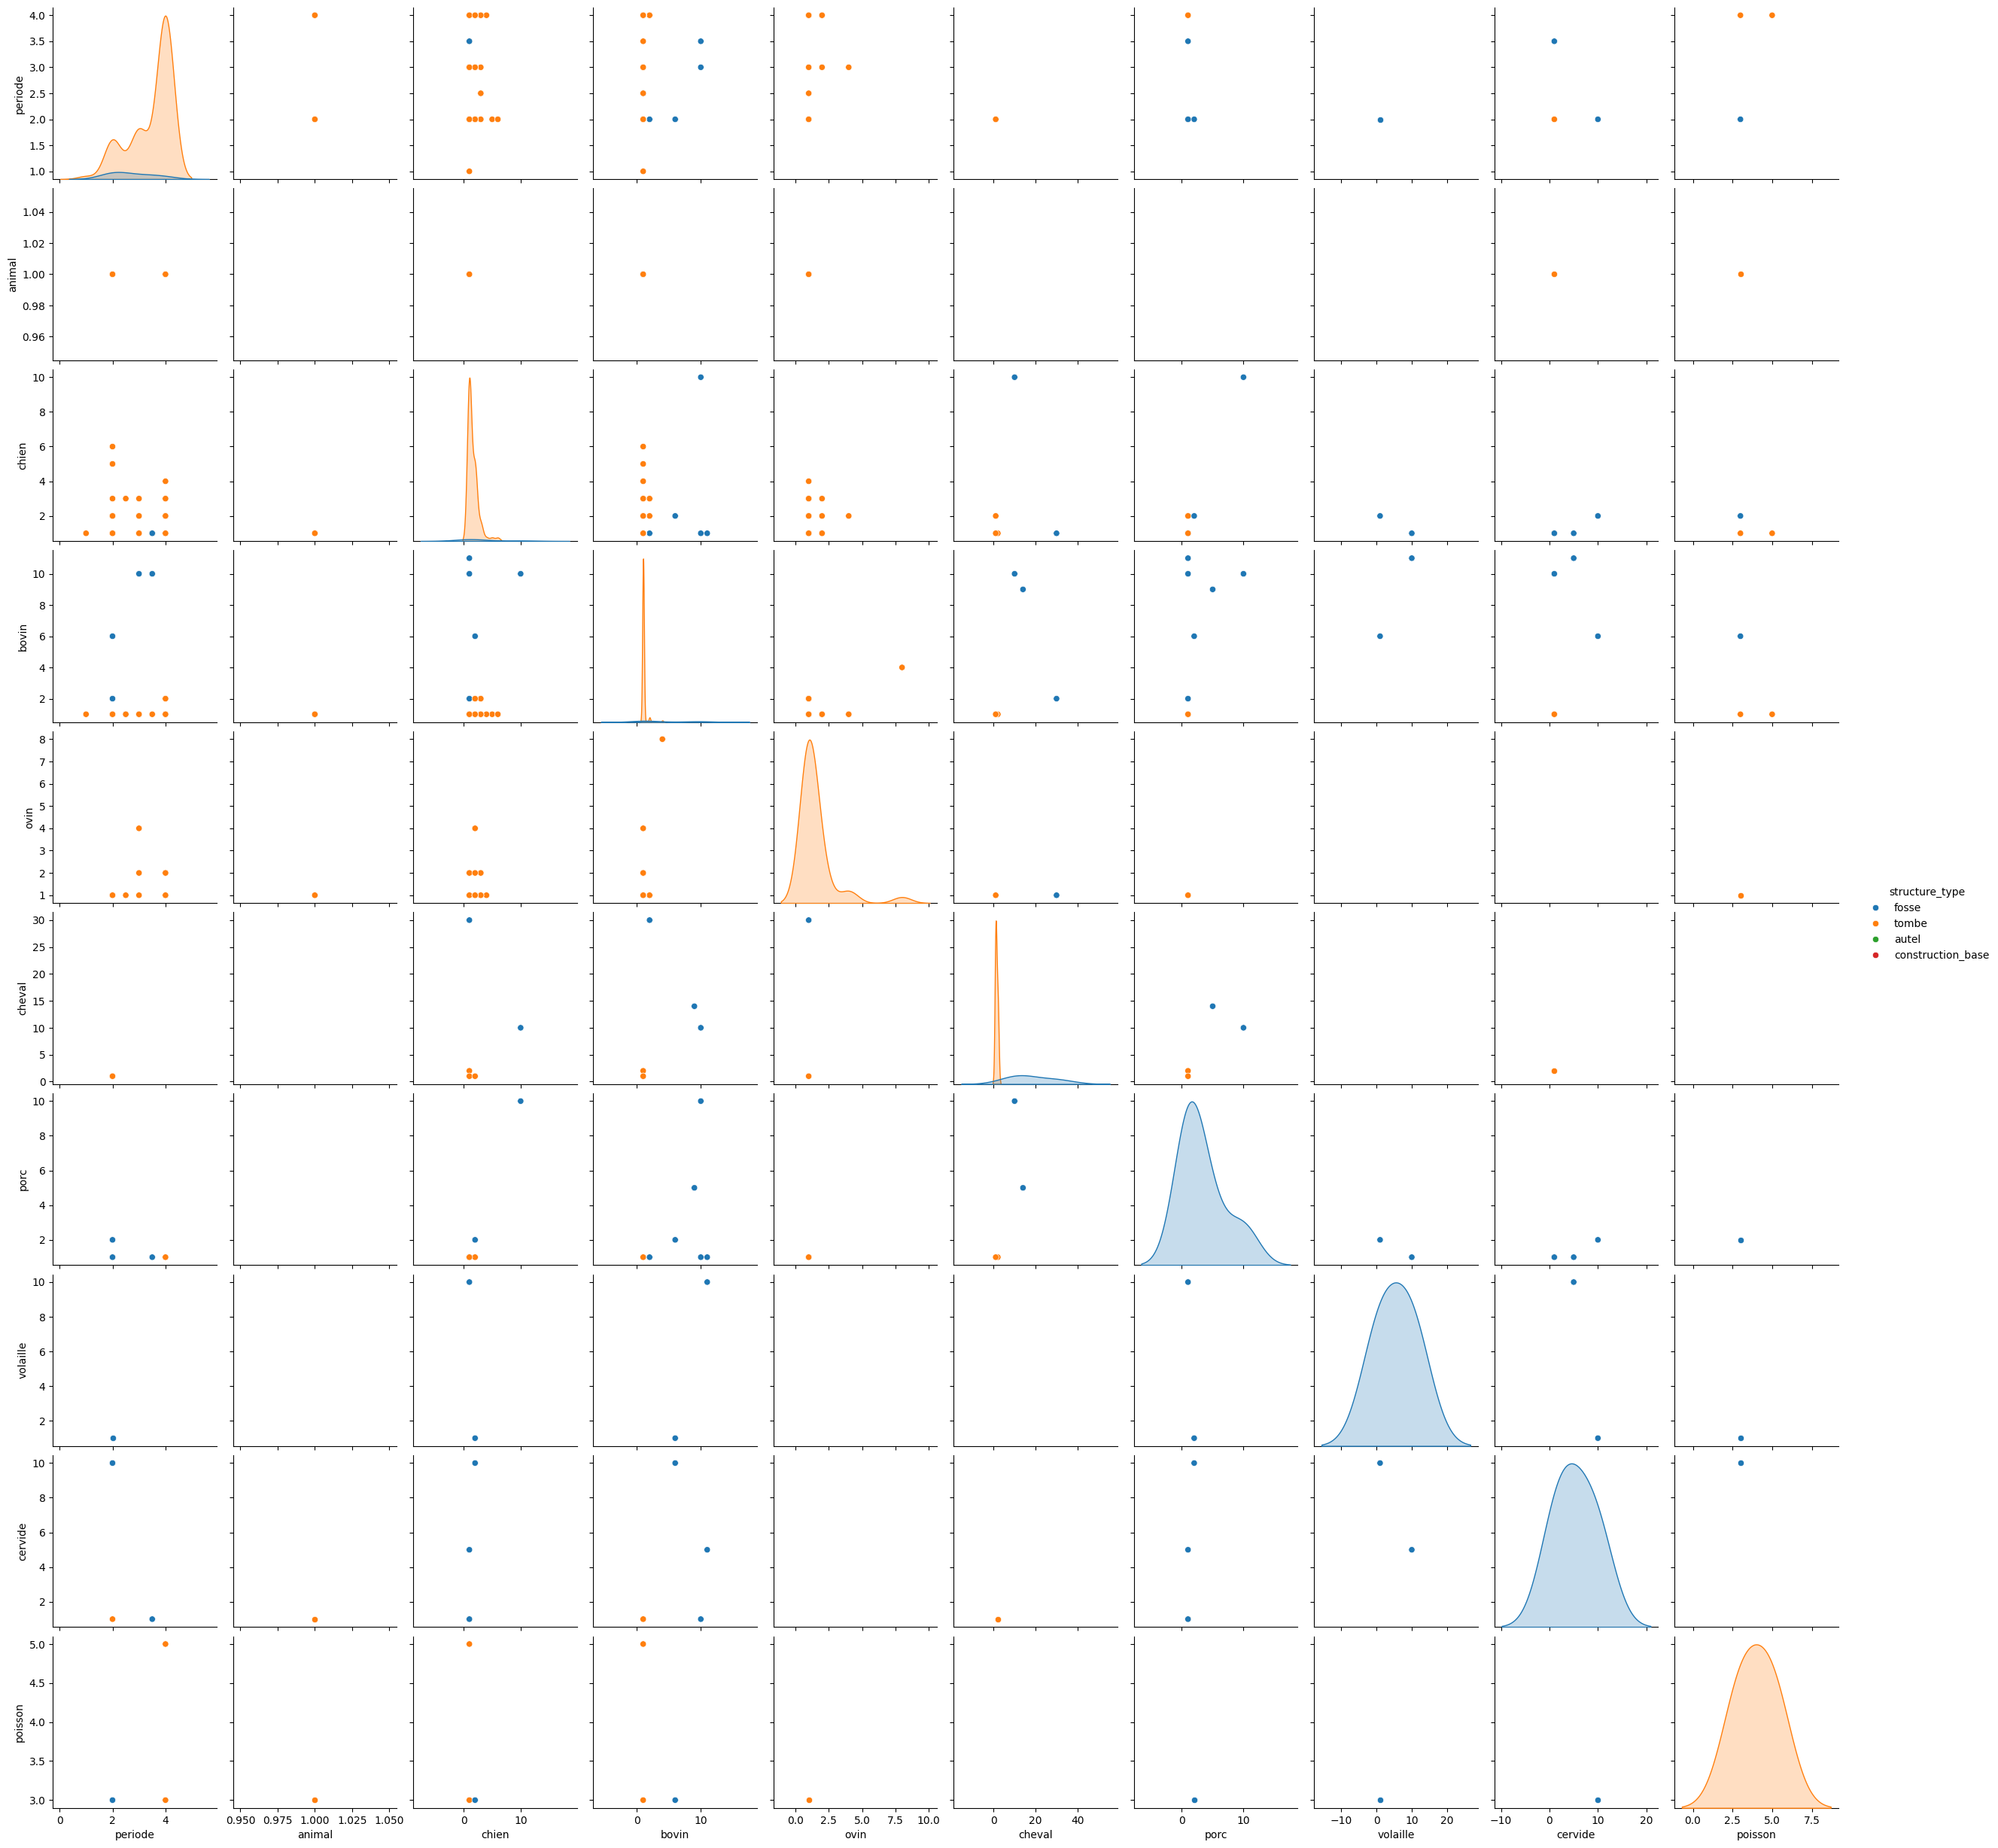

In [ ]:
sns.pairplot(data = df3, hue ='structure_type')
plt.show()

In [ ]:
df2 = pd.read_excel('/content/drive/MyDrive/mémoire/data/emp_par.xlsx')


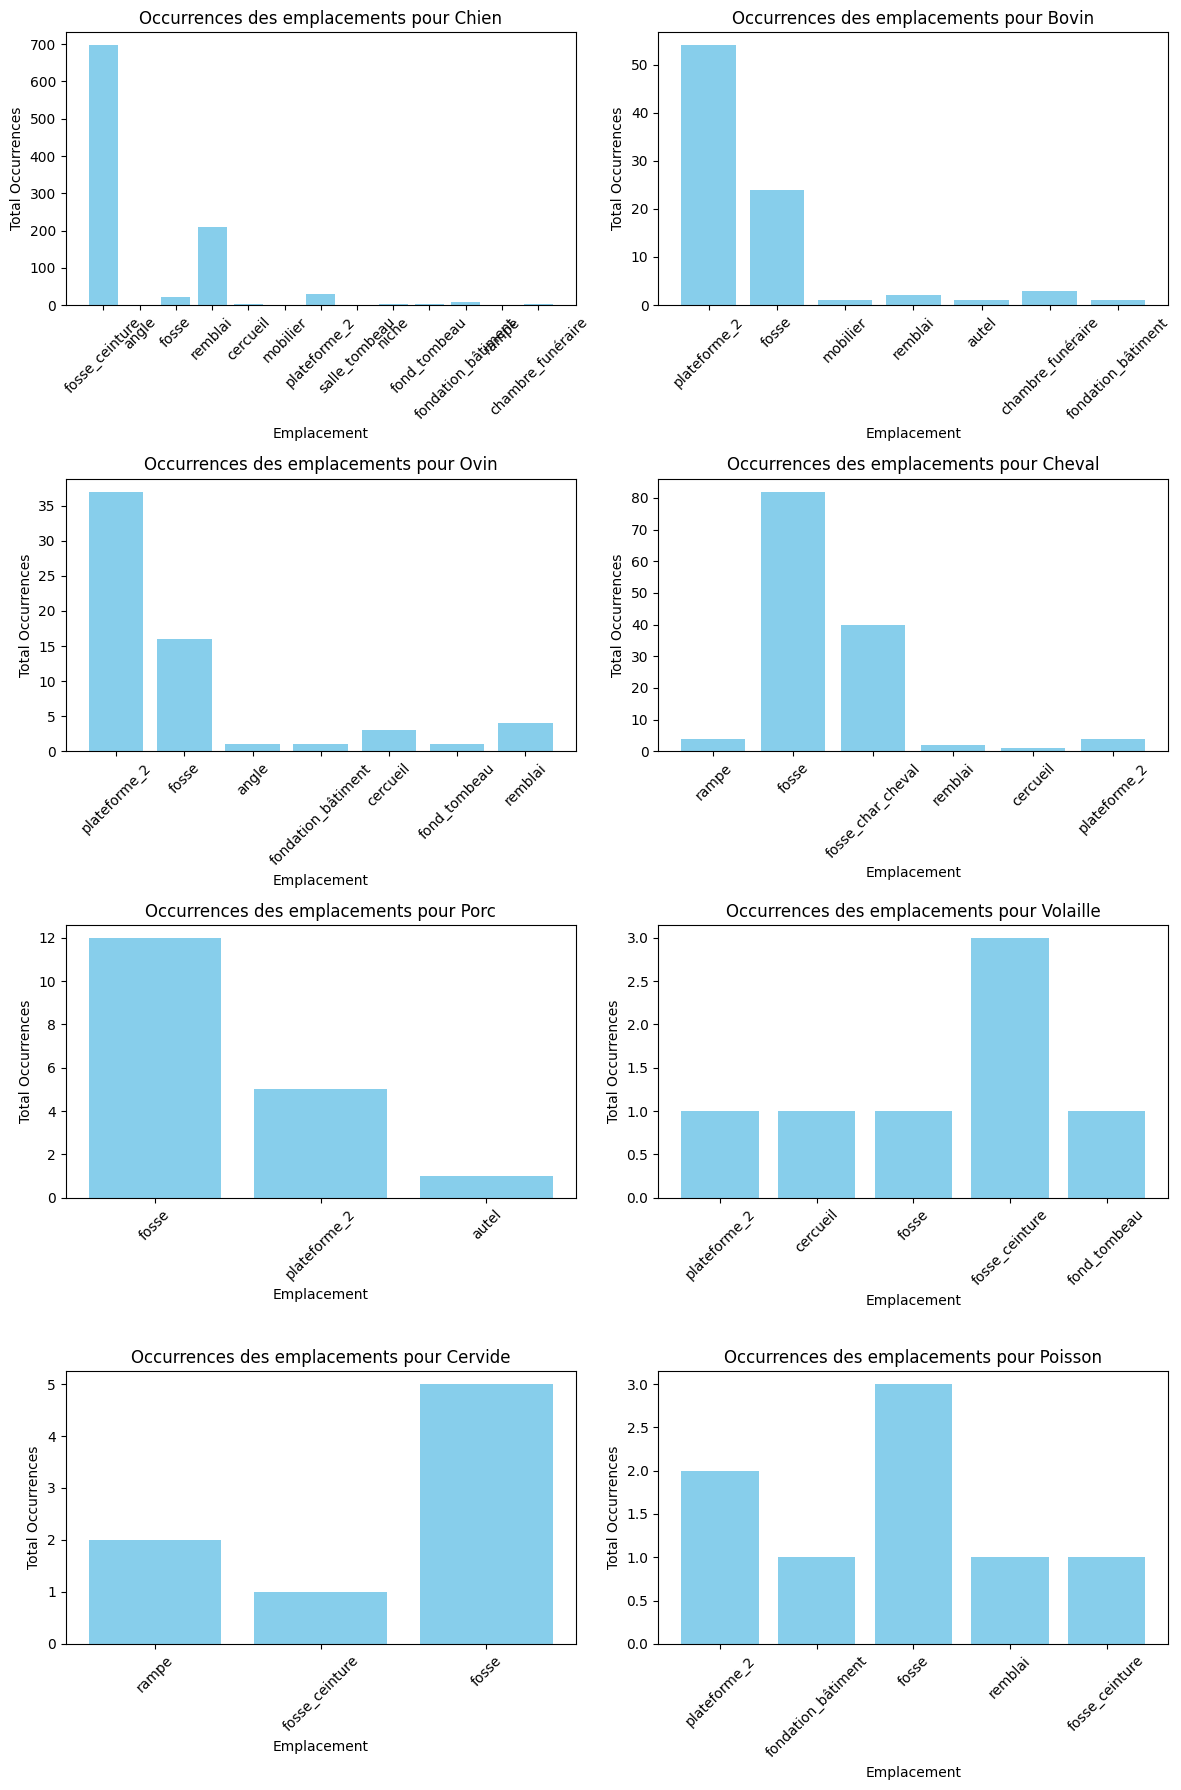

In [ ]:

from collections import Counter

# Fonction pour compter les occurrences des emplacements dans une colonne
def count_locations(column):
    return Counter(column.dropna())

# Liste des types d'animaux
animal_types = ['chien', 'bovin', 'ovin', 'cheval', 'porc',
                'volaille', 'cervide', 'poisson']

# Dictionnaire pour stocker les DataFrames de résultats pour chaque type d'animal
location_counts_df = {}

# Créer une figure avec 3 lignes et 2 colonnes
fig, axes = plt.subplots(4, 2, figsize=(12, 18))
axes = axes.flatten()  # Aplatir le tableau d'axes pour une itération facile

# Calculer les occurrences pour chaque type d'animal
for i, animal in enumerate(animal_types):
    # Compter les occurrences pour le type d'animal
    counts = count_locations(df2[f'{animal}_emp'])

    # Convertir en DataFrame
    counts_df = pd.DataFrame(counts.items(), columns=['Emplacement', 'Total Occurrences'])

    # Ajouter le DataFrame au dictionnaire
    location_counts_df[animal] = counts_df

    # Tracer l'histogramme dans le bon sous-axe
    axes[i].bar(counts_df['Emplacement'], counts_df['Total Occurrences'], color='skyblue')
    axes[i].set_title(f'Occurrences des emplacements pour {animal.capitalize()}')
    axes[i].set_xlabel('Emplacement')
    axes[i].set_ylabel('Total Occurrences')
    axes[i].tick_params(axis='x', rotation=45)

# Ajuster l'espacement entre les sous-figures
plt.tight_layout()

# Sauvegarder l'image
plt.savefig('occurrences_emplacements_animaux.png')

# Afficher la figure
plt.show()


In [ ]:
from collections import Counter

# Supposons que df2 est votre DataFrame

# Fonction pour compter les occurrences des emplacements dans une colonne
def count_locations(column):
    return Counter(column.dropna())

# Calculer les occurrences pour chaque type d'animal
location_counts = {animal: count_locations(df2[f'{animal}_emp']) for animal in ['animal','chien', 'bovin', 'ovin', 'cheval', 'porc',
                                                                               'volaille', 'cervide', 'poisson', 'singe',
                                                                               'renard', 'elephant']}

# Somme des occurrences pour chaque emplacement
total_location_counts = Counter()

# Additionner les occurrences de chaque type d'animal
for counts in location_counts.values():
    total_location_counts.update(counts)

# Convertir en DataFrame pour affichage
total_location_counts_df = pd.DataFrame(total_location_counts.items(), columns=['Emplacement', 'Total Occurrences'])

# Affichage du DataFrame
print(total_location_counts_df)


           Emplacement  Total Occurrences
0                fosse                188
1         plateforme_2                156
2       fosse_ceinture                703
3             cercueil                 10
4                niche                  5
5             mobilier                  5
6                rampe                  9
7                angle                  2
8              remblai                219
9        salle_tombeau                  1
10        fond_tombeau                  4
11  fondation_bâtiment                 12
12   chambre_funéraire                  5
13               autel                  2
14   fosse_char_cheval                 40


<Figure size 1200x600 with 0 Axes>

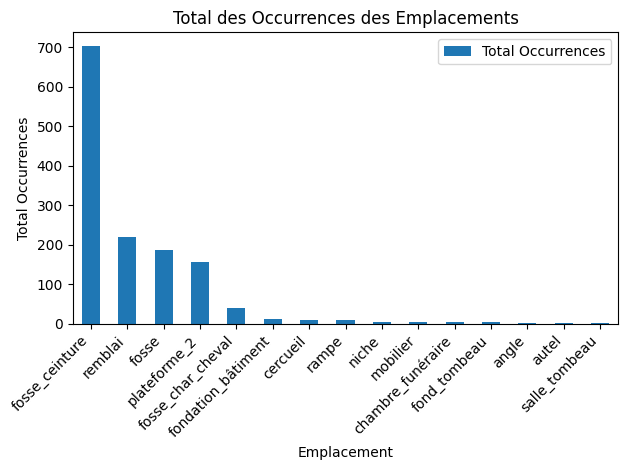

In [ ]:
plt.figure(figsize=(12, 6))
total_location_counts_df.sort_values('Total Occurrences', ascending=False).plot(kind='bar', x='Emplacement', y='Total Occurrences')
plt.title('Occurrences des Emplacements')
plt.xlabel('Emplacement')
plt.ylabel('Total Occurrences')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



In [ ]:
# Liste des types d'animaux
animals = ['chien', 'bovin', 'ovin', 'cheval', 'porc', 'volaille', 'poisson', 'cervidé']

# Créer une figure avec 2 colonnes et 3 lignes
fig, axes = plt.subplots(4, 2, figsize=(12, 18))  # Ajuster la taille selon les besoins
axes = axes.flatten()  # Aplatir le tableau d'axes pour une itération facile

# Boucle pour créer un graphique pour chaque type d'animal
for i, animal in enumerate(animals):
    # Trier les emplacements par nombre d'occurrences pour cet animal
    animal_locations = location_counts_df[animal].sort_values(ascending=False)

    # Créer le graphique dans le bon sous-axe
    animal_locations.plot(kind='bar', ax=axes[i])
    axes[i].set_title(f"Occurrences des emplacement d'os pour {animal.capitalize()}")
    axes[i].set_xlabel('Emplacement')
    axes[i].set_ylabel('Occurrences')
    axes[i].tick_params(axis='x', rotation=45)

# Ajuster l'espacement entre les sous-figures
plt.tight_layout()

# Sauvegarder l'image
plt.savefig('occurrences_emplacements_animaux.png')

# Afficher la figure
plt.show()

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/mémoire/data/3_data_gis_num.xlsx')

                                Emplacements  Total Occurrences
0                      cercueil;plateforme_2                  1
1                     fosse_ceinture;remblai                135
2                fosse_ceinture;plateforme_2                 24
3        fosse_ceinture;remblai;plateforme_2                  7
4                        fosse_ceinture;coté                  1
5                fosse_ceinture;remblai;coté                  1
6                    fosse_ceinture;cercueil                  2
7                fosse_ceinture;fond_tombeau                  1
8                    cercueil;fosse_ceinture                  1
9                       remblai;plateforme_2                  2
10                      fosse_ceinture;allée                  1
11              fosse_ceinture;salle_tombeau                  1
12  chambre_funéraire;fosse_ceinture;remblai                  1
13                     plateforme_2;cercueil                  1
14                          cercueil;rem

<Figure size 5000x2000 with 0 Axes>

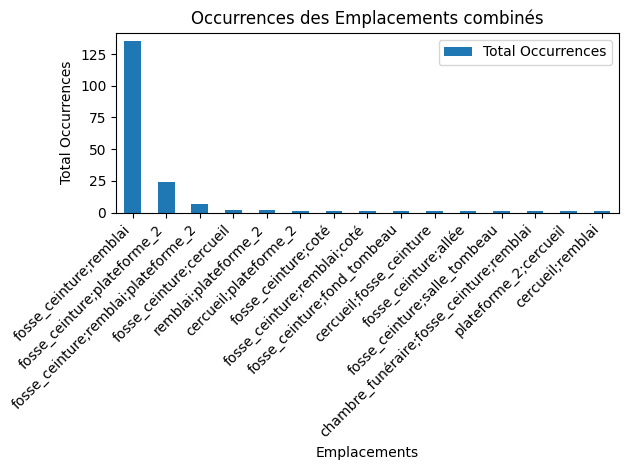

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

# Supposez que 'df' est déjà chargé avec vos données

# Fonction pour compter les occurrences des duos d'emplacements dans une colonne
def count_duo_locations(column):
    # Convertir en string pour pouvoir utiliser .str.contains()
    column = column.astype(str)
    # Filtrer les valeurs qui contiennent un point-virgule ';'
    duos = column[column.str.contains(';', na=False)]
    return Counter(duos.dropna())

# Calculer les occurrences pour chaque type d'animal, mais seulement les duos
duo_location_counts = {animal: count_duo_locations(df[f'{animal}_emp']) for animal in ['animal','chien', 'bovin', 'ovin', 'cheval', 'porc',
                                                                                       'volaille', 'cervide', 'poisson', 'singe',
                                                                                       'renard', 'lapin', 'elephant']}

# Convertir les comptes en DataFrame
duo_location_counts_df = pd.DataFrame(duo_location_counts).fillna(0).astype(int)

# Somme des occurrences pour chaque duo d'emplacements
total_duo_location_counts = duo_location_counts_df.sum(axis=1)

# Convertir en DataFrame pour affichage
total_duo_location_counts_df = total_duo_location_counts.reset_index()
total_duo_location_counts_df.columns = ['Emplacements', 'Total Occurrences']

# Filtrer les duos d'emplacements avec plus de 10 occurrences
#filtered_duo_location_counts_df = total_duo_location_counts_df[total_duo_location_counts_df['Total Occurrences'] > 1]

# Afficher les duos d'emplacements filtrés
print(total_duo_location_counts_df)

plt.figure(figsize=(50, 20))
ax = total_duo_location_counts_df.sort_values('Total Occurrences', ascending=False).plot(kind='bar', x='Emplacements', y='Total Occurrences')

plt.title('Occurrences des Emplacements combinés')
plt.xlabel('Emplacements')
plt.ylabel('Total Occurrences')
plt.xticks(rotation=45, ha='right')  # Alignement à droite
plt.tight_layout()
plt.show()


In [ ]:
duo_location_counts_df

,animal,chien,bovin,ovin,cheval,porc,volaille,cervide,poisson,singe,renard,lapin,elephant
cercueil;plateforme_2,1,0,0,0,0,0,0,0,0,0,0,0,0
fosse_ceinture;remblai,0,134,0,0,0,0,1,0,0,0,0,0,0
fosse_ceinture;plateforme_2,0,24,0,0,0,0,0,0,0,0,0,0,0
fosse_ceinture;remblai;plateforme_2,0,7,0,0,0,0,0,0,0,0,0,0,0
fosse_ceinture;jiaotou,0,1,0,0,0,0,0,0,0,0,0,0,0
fosse_ceinture;remblai;jiaotou,0,1,0,0,0,0,0,0,0,0,0,0,0
fosse_ceinture;cercueil,0,2,0,0,0,0,0,0,0,0,0,0,0
fosse_ceinture;fond_tombeau,0,1,0,0,0,0,0,0,0,0,0,0,0
cercueil;fosse_ceinture,0,1,0,0,0,0,0,0,0,0,0,0,0
remblai;plateforme_2,0,2,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
import pandas as pd

# Supposez que 'df' est déjà chargé avec vos données

# Liste des colonnes d'emplacements
cols_emp = ["animal_emp", "chien_emp", "bovin_emp", "ovin_emp", "cheval_emp",
            "porc_emp", "volaille_emp", "cervide_emp", "poisson_emp",
            "singe_emp", "renard_emp", "lapin_emp", "elephant_emp"]

# Réorganiser le DataFrame pour avoir une seule colonne d'emplacement
df_melted = df.melt(id_vars=['periode', 'site'], value_vars=cols_emp,
                    var_name='Type Animal', value_name='Emplacement')

# Filtrer les lignes où l'emplacement n'est pas manquant
df_melted = df_melted.dropna(subset=['Emplacement'])

# Afficher un aperçu des données réorganisées
print(df_melted.head())



     periode          site Type Animal   Emplacement
0        NaN   Yinxu_ouest  animal_emp         fosse
1        NaN   Yinxu_ouest  animal_emp         fosse
11       4.0  Renjiazhuang  animal_emp  plateforme_2
120      NaN      Dasikong  animal_emp  plateforme_2
121      NaN      Dasikong  animal_emp  plateforme_2


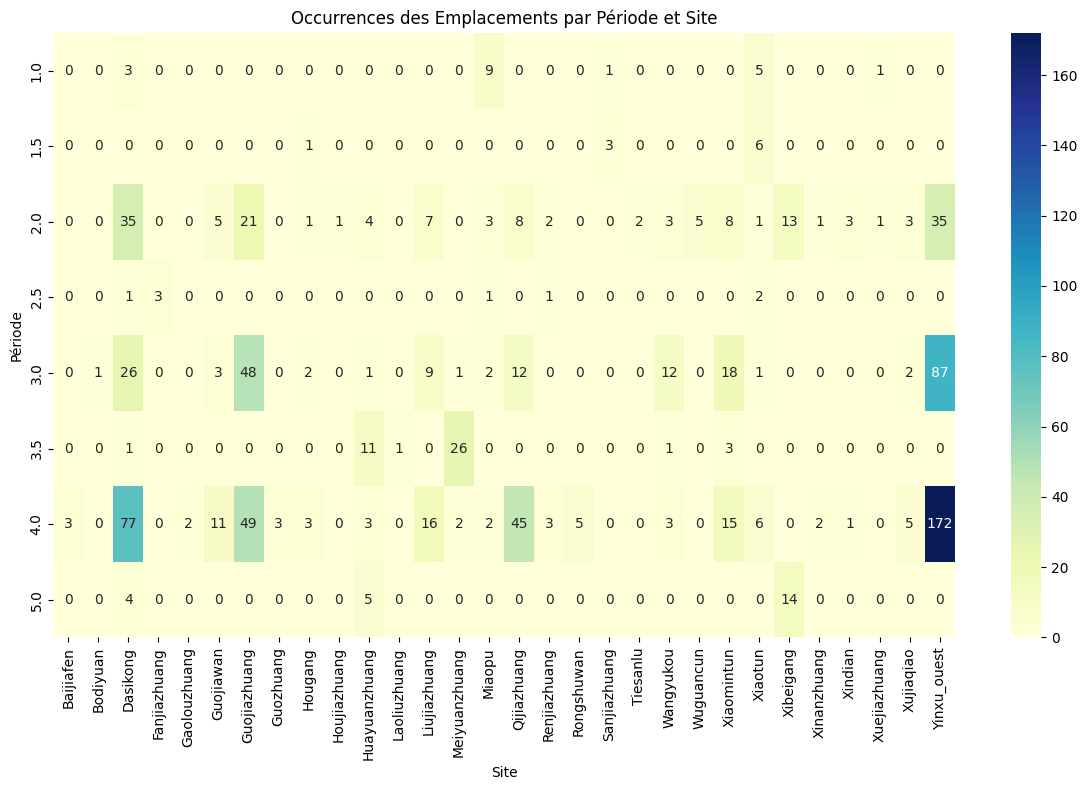

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Créer un tableau croisé dynamique pour compter les occurrences par période et site
pivot_period_location = pd.pivot_table(df_melted, values='Emplacement', index='periode', columns='site', aggfunc='size', fill_value=0)

# Créer la heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_period_location, cmap="YlGnBu", annot=True, fmt="d")
plt.title('Occurrences des Emplacements par Période et Site')
plt.xlabel('Site')
plt.ylabel('Période')
plt.tight_layout()
plt.show()


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/emp.xlsx')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supposez que 'df' est déjà chargé avec vos données

# Liste des colonnes d'emplacements
cols_emp = ["animal_emp", "chien_emp", "bovin_emp", "ovin_emp", "cheval_emp",
            "porc_emp", "volaille_emp", "cervide_emp", "poisson_emp",
            "singe_emp", "renard_emp", "lapin_emp", "elephant_emp"]

# Réorganiser le DataFrame pour avoir une seule colonne d'emplacement
df_melted = df.melt(id_vars=['periode', 'site'], value_vars=cols_emp,
                    var_name='Type Animal', value_name='Emplacement')

# Filtrer les lignes où l'emplacement n'est pas manquant
df_melted = df_melted.dropna(subset=['Emplacement'])

# Compter les occurrences de chaque emplacement
location_counts = df_melted['Emplacement'].value_counts()

# Filtrer les emplacements ayant plus de 10 occurrences
filtered_locations = location_counts[location_counts > 10].index
df_filtered = df_melted[df_melted['Emplacement'].isin(filtered_locations)]

# Afficher un aperçu des données filtrées
print(df_filtered.head())



     periode          site Type Animal   Emplacement
0        NaN   Yinxu_ouest  animal_emp         fosse
1        NaN   Yinxu_ouest  animal_emp         fosse
11       4.0  Renjiazhuang  animal_emp  plateforme_2
120      NaN      Dasikong  animal_emp  plateforme_2
121      NaN      Dasikong  animal_emp  plateforme_2


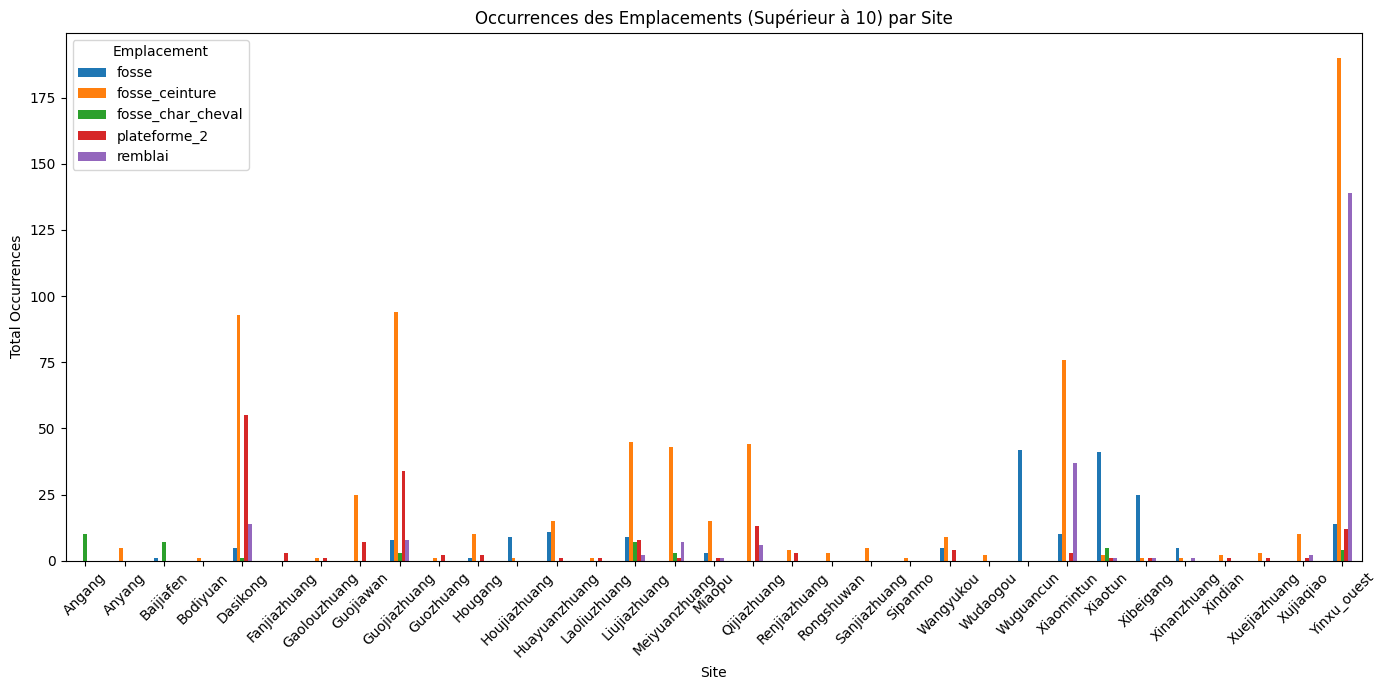

In [ ]:
# Groupby pour calculer les occurrences par site et emplacement
site_location_counts = df_filtered.groupby(['site', 'Emplacement']).size().unstack(fill_value=0)

# Créer le graphique à barres groupées
site_location_counts.plot(kind='bar', figsize=(14, 7))
plt.title('Occurrences des Emplacements (Supérieur à 10) par Site')
plt.xlabel('Site')
plt.ylabel('Total Occurrences')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


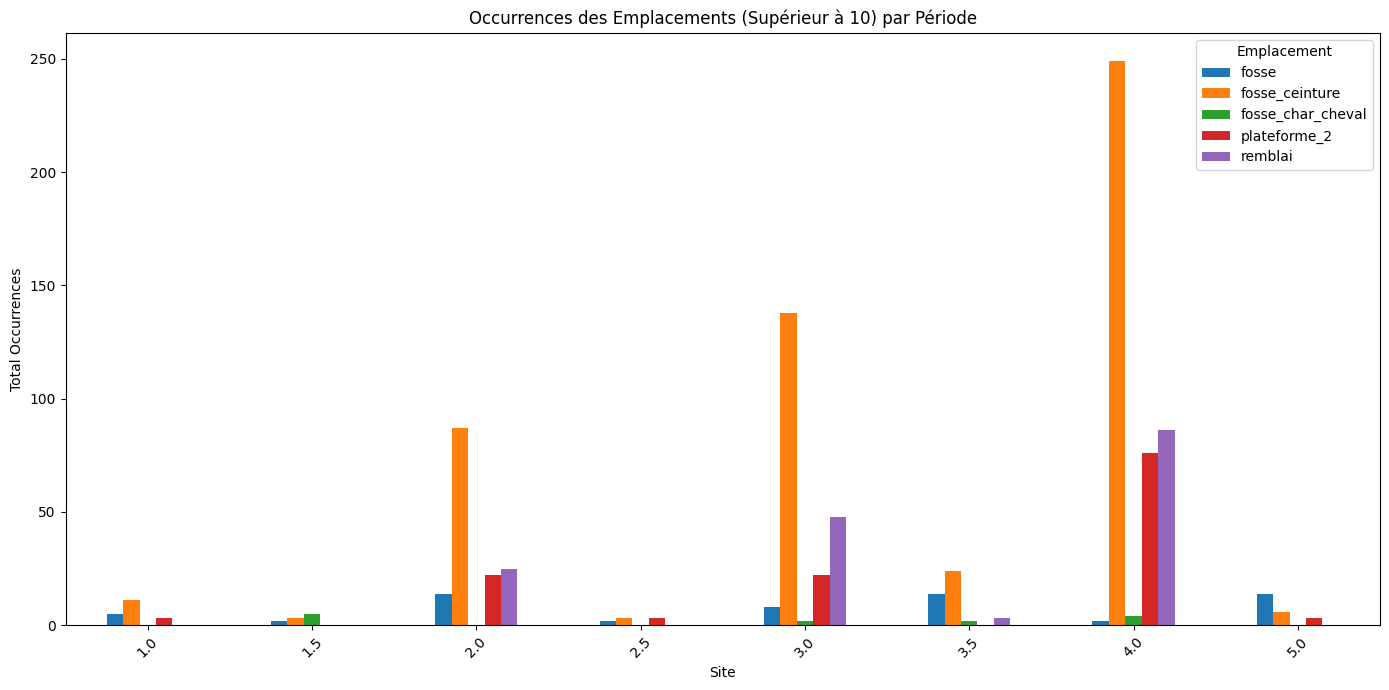

In [ ]:
# Groupby pour calculer les occurrences par site et emplacement
site_location_counts = df_filtered.groupby(['periode', 'Emplacement']).size().unstack(fill_value=0)

# Créer le graphique à barres groupées
site_location_counts.plot(kind='bar', figsize=(14, 7))
plt.title('Occurrences des Emplacements (Supérieur à 10) par Période')
plt.xlabel('Site')
plt.ylabel('Total Occurrences')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


               chien  bovin  ovin  cheval  porc  volaille  cervide  poisson  \
entier           954      1     2      47     4         3        1        1   
membre             5     94    86       4    14         1        0        0   
tête               6      3     6       2     5         0        0        0   
os                 3      5     6       0     0         3        0        7   
dent               1      0     0       0     1         0        0        0   
sans_tête          0      1     0       0     0         0        0        0   
mâchoire           0      1     0       0     0         0        0        0   
corne              0      4     0       0     0         0        7        0   
vertèbre           0      1     0       0     0         0        0        0   
côte               0      1     0       0     0         0        0        0   
scapulas           0      2     2       0     0         0        0        0   
mandibule          0      1     0       0     0     

<Figure size 1200x600 with 0 Axes>

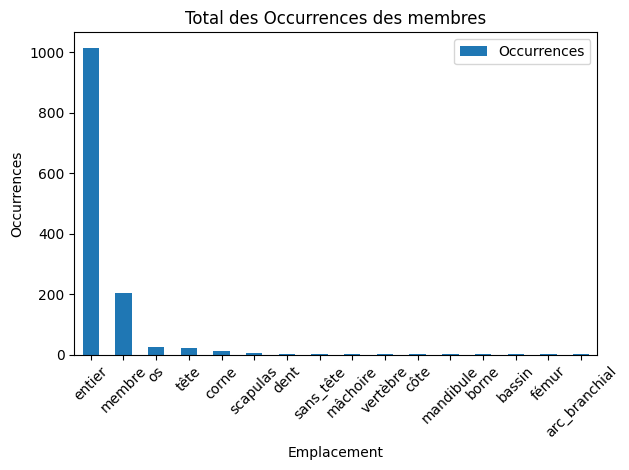

In [ ]:
###################membres
# Supposons que les colonnes d'emplacements contiennent des noms de lieux
# Regrouper par chaque type d'animal et compter les occurrences
from collections import Counter

df = pd.read_excel('/content/drive/MyDrive/mémoire/data/membredoc.xlsx')
# Fonction pour compter les occurrences des emplacements dans une colonne
def count_locations(column):
    return Counter(column.dropna())


# Calculer les occurrences pour chaque type d'animal
location_counts = {animal: count_locations(df[f'{animal}_part']) for animal in ['chien', 'bovin', 'ovin', 'cheval', 'porc',
                                                                               'volaille', 'cervide', 'poisson', 'singe',
                                                                               'renard', 'elephant', 'oiseaux']}
# Convertir les comptes en DataFrame
location_counts_df = pd.DataFrame(location_counts).fillna(0).astype(int)


print(location_counts_df)
# Somme des occurrences pour chaque emplacement
total_location_counts = location_counts_df.sum(axis=1)


# Convertir en DataFrame pour affichage
total_location_counts_df = total_location_counts.reset_index()
total_location_counts_df.columns = ['Emplacement', 'Occurrences']


print(total_location_counts_df)
plt.figure(figsize=(12, 6))
total_location_counts_df.sort_values('Occurrences', ascending=False).plot(kind='bar', x='Emplacement', y='Occurrences')
plt.title('Total des Occurrences des membres')
plt.xlabel('Emplacement')
plt.ylabel('Occurrences')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


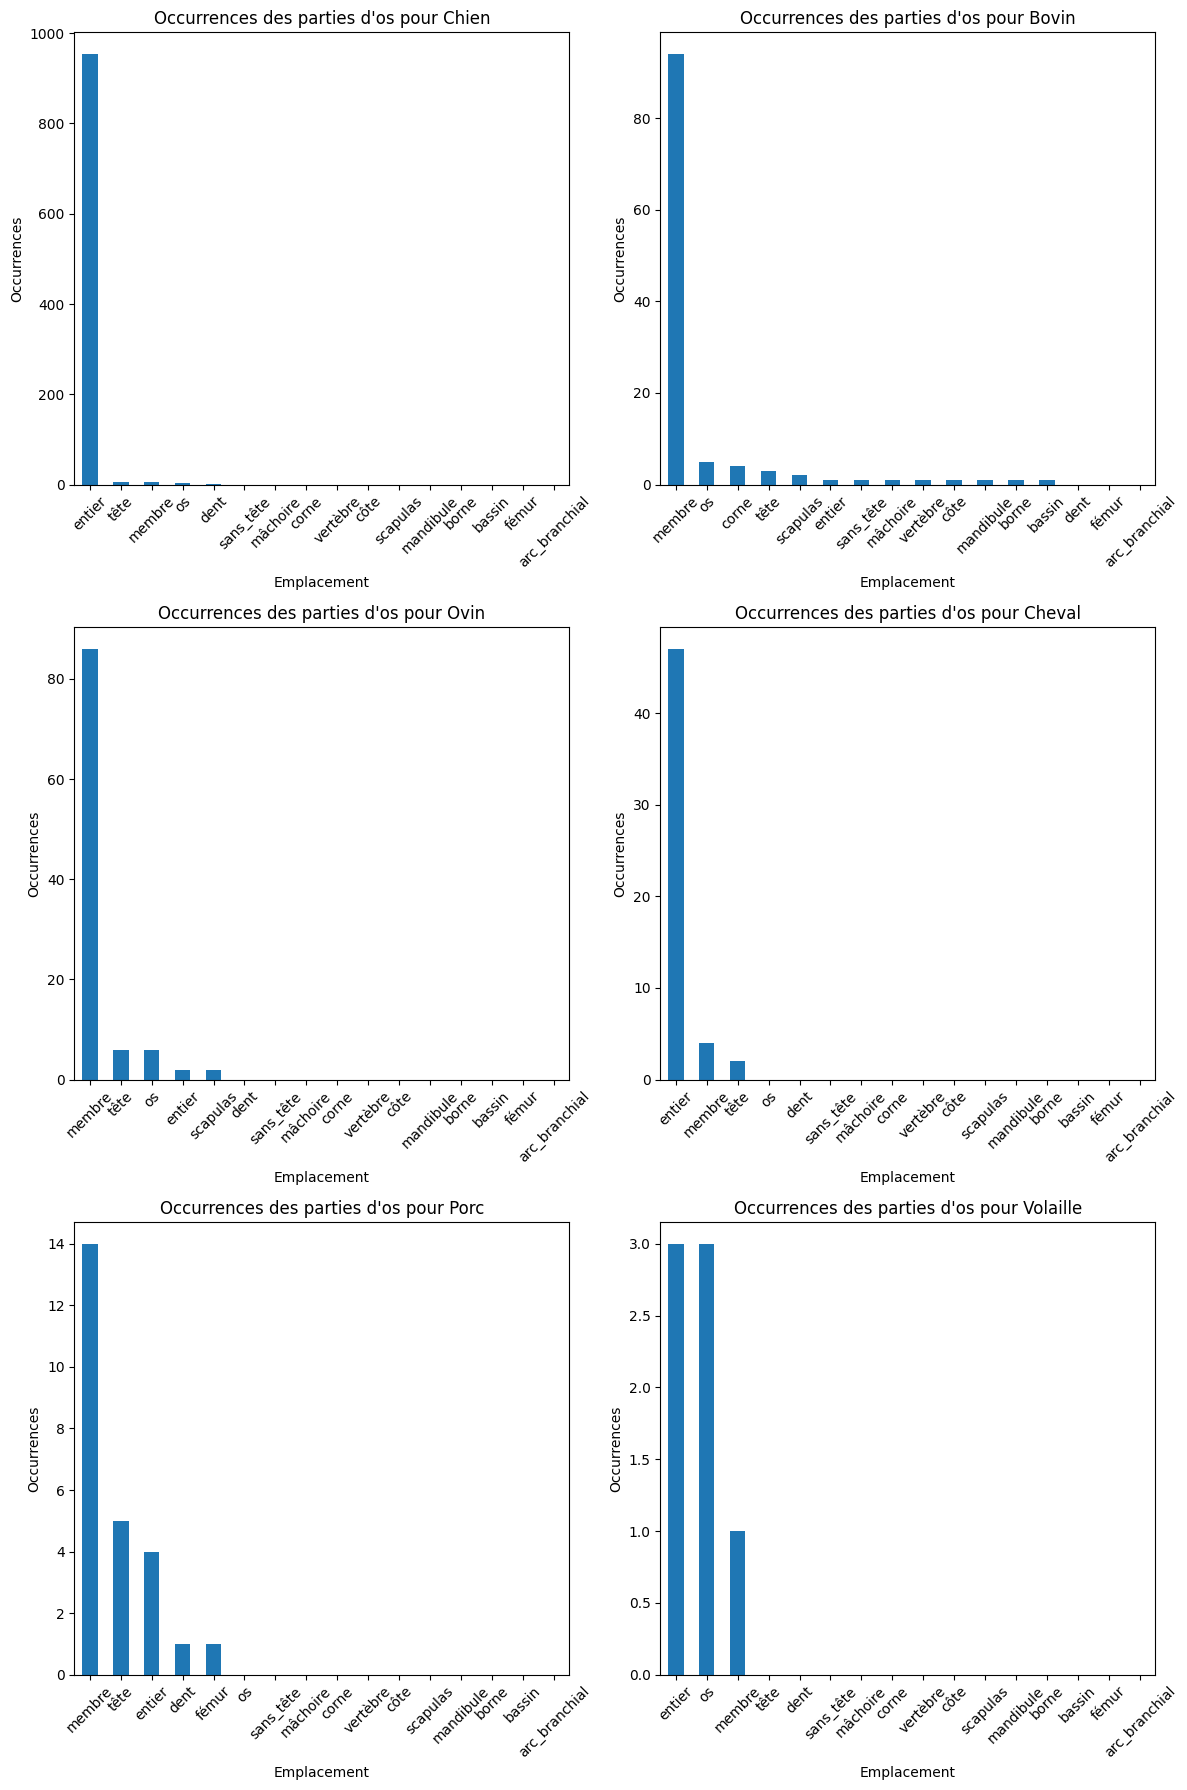

In [ ]:
import matplotlib.pyplot as plt

# Liste des types d'animaux
animals = ['chien', 'bovin', 'ovin', 'cheval', 'porc', 'volaille']

# Créer une figure avec 2 colonnes et 3 lignes
fig, axes = plt.subplots(3, 2, figsize=(12, 18))  # Ajuster la taille selon les besoins
axes = axes.flatten()  # Aplatir le tableau d'axes pour une itération facile

# Boucle pour créer un graphique pour chaque type d'animal
for i, animal in enumerate(animals):
    # Trier les emplacements par nombre d'occurrences pour cet animal
    animal_locations = location_counts_df[animal].sort_values(ascending=False)

    # Créer le graphique dans le bon sous-axe
    animal_locations.plot(kind='bar', ax=axes[i])
    axes[i].set_title(f"Occurrences des parties d'os pour {animal.capitalize()}")
    axes[i].set_xlabel('Emplacement')
    axes[i].set_ylabel('Occurrences')
    axes[i].tick_params(axis='x', rotation=45)

# Ajuster l'espacement entre les sous-figures
plt.tight_layout()

# Sauvegarder l'image
plt.savefig('occurrences_emplacements_animaux.png')

# Afficher la figure
plt.show()


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/mémoire/data/membredoc.xlsx')


In [ ]:
# Listes des colonnes pour les membres et les emplacements pour tous les animaux
animal_part_cols = ["animal_part", "chien_part", "bovin_part", "ovin_part", "cheval_part",
                    "porc_part", "volaille_part", "cervide_part", "poisson_part",
                    "singe_part", "renard_part", "elephant_part"]
animal_emp_cols = ["animal_emp", "chien_emp", "bovin_emp", "ovin_emp", "cheval_emp",
                   "porc_emp", "volaille_emp", "cervide_emp", "poisson_emp",
                   "singe_emp", "renard_emp", "elephant_emp"]

# Réorganiser les données pour obtenir une colonne unique pour les membres et une colonne unique pour les emplacements
df_part = df[animal_part_cols].melt(value_name='Membre', var_name='Part_Column')
df_emp = df[animal_emp_cols].melt(value_name='Emplacement', var_name='Emp_Column')

# Fusionner les données par index (en supposant que les membres et les emplacements correspondent ligne à ligne)
df_combined = pd.concat([df_part, df_emp], axis=1)

# Supprimer les lignes où l'un des deux champs est NaN
df_combined = df_combined.dropna(subset=['Membre', 'Emplacement'])

# Afficher un aperçu des données fusionnées
print(df_combined.head())


     Part_Column  Membre  Emp_Column   Emplacement
11   animal_part    tête  animal_emp  plateforme_2
120  animal_part  membre  animal_emp  plateforme_2
121  animal_part  membre  animal_emp  plateforme_2
122  animal_part  membre  animal_emp  plateforme_2
123  animal_part  membre  animal_emp  plateforme_2


In [ ]:
# Créer un tableau croisé dynamique global
pivot_table_global = pd.pivot_table(df_combined, index='Emplacement', columns='Membre', aggfunc='size', fill_value=0)

# Afficher le tableau croisé dynamique global
print(pivot_table_global)


Membre             corne  entier  membre  os  sans_tête  scapulas  tête
Emplacement                                                            
angle                  0       1       1   0          0         0     0
cercueil               0       5       3   0          0         0     1
chambre_funéraire      0       3       3   0          0         0     0
fond_tombeau           0       3       0   0          0         0     0
fosse                  0      35       0   0          0         0     0
fosse_ceinture         1     697       0   2          0         0     0
mobilier               0       0       3   0          0         0     0
niche                  0       3       0   3          0         0     0
plateforme_2           0      29      99   8          1         2     9
rampe                  0       6       0   0          0         0     0
remblai                0     211       5   0          0         0     0
salle_tombeau          0       1       0   0          0         

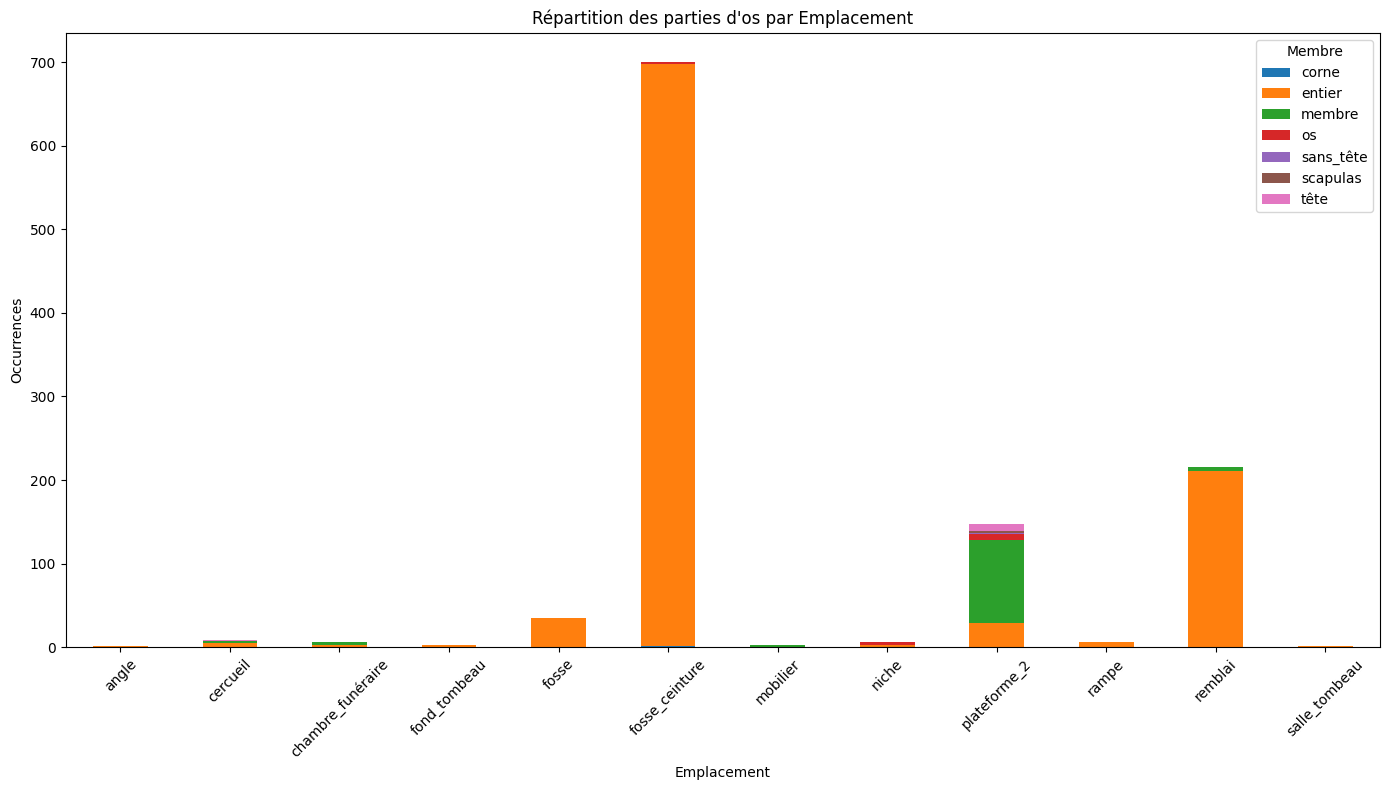

In [ ]:
# Créer un graphique en barres global
pivot_table_global.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title("Répartition des parties d'os par Emplacement")
plt.xlabel('Emplacement')
plt.ylabel('Occurrences')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Membre           corne  omoplate  os  sans_tête  tête
Emplacement                                          
cercueil             0         0   0          0     0
coté                 0         0   0          0     0
ercengtai            0         2   8          1     9
fond_tombeau         0         0   0          0     0
fosse                0         0   0          0     0
passage_tombeau      0         0   0          0     0
salle_tombeau        0         0   0          0     0
tiantu               0         0   0          0     0
yaokeng              1         0   2          0     0
前台                   0         0   0          0     0
壁龛                   0         0   2          0     0
棺室                   0         0   0          0     0
棺椁                   0         0   0          0     0
棺盖                   0         0   0          0     0
椁台                   0         0   0          0     0
椁室                   0         0   0          0     0
椁盖                   0      

<ipython-input-96-b4bbf0a6d95e>:19: UserWarning: Glyph 21069 (\N{CJK UNIFIED IDEOGRAPH-524D}) missing from current font.
  plt.tight_layout()
<ipython-input-96-b4bbf0a6d95e>:19: UserWarning: Glyph 21488 (\N{CJK UNIFIED IDEOGRAPH-53F0}) missing from current font.
  plt.tight_layout()
<ipython-input-96-b4bbf0a6d95e>:19: UserWarning: Glyph 22721 (\N{CJK UNIFIED IDEOGRAPH-58C1}) missing from current font.
  plt.tight_layout()
<ipython-input-96-b4bbf0a6d95e>:19: UserWarning: Glyph 40859 (\N{CJK UNIFIED IDEOGRAPH-9F9B}) missing from current font.
  plt.tight_layout()
<ipython-input-96-b4bbf0a6d95e>:19: UserWarning: Glyph 26874 (\N{CJK UNIFIED IDEOGRAPH-68FA}) missing from current font.
  plt.tight_layout()
<ipython-input-96-b4bbf0a6d95e>:19: UserWarning: Glyph 23460 (\N{CJK UNIFIED IDEOGRAPH-5BA4}) missing from current font.
  plt.tight_layout()
<ipython-input-96-b4bbf0a6d95e>:19: UserWarning: Glyph 26881 (\N{CJK UNIFIED IDEOGRAPH-6901}) missing from current font.
  plt.tight_layout()
<ipyth

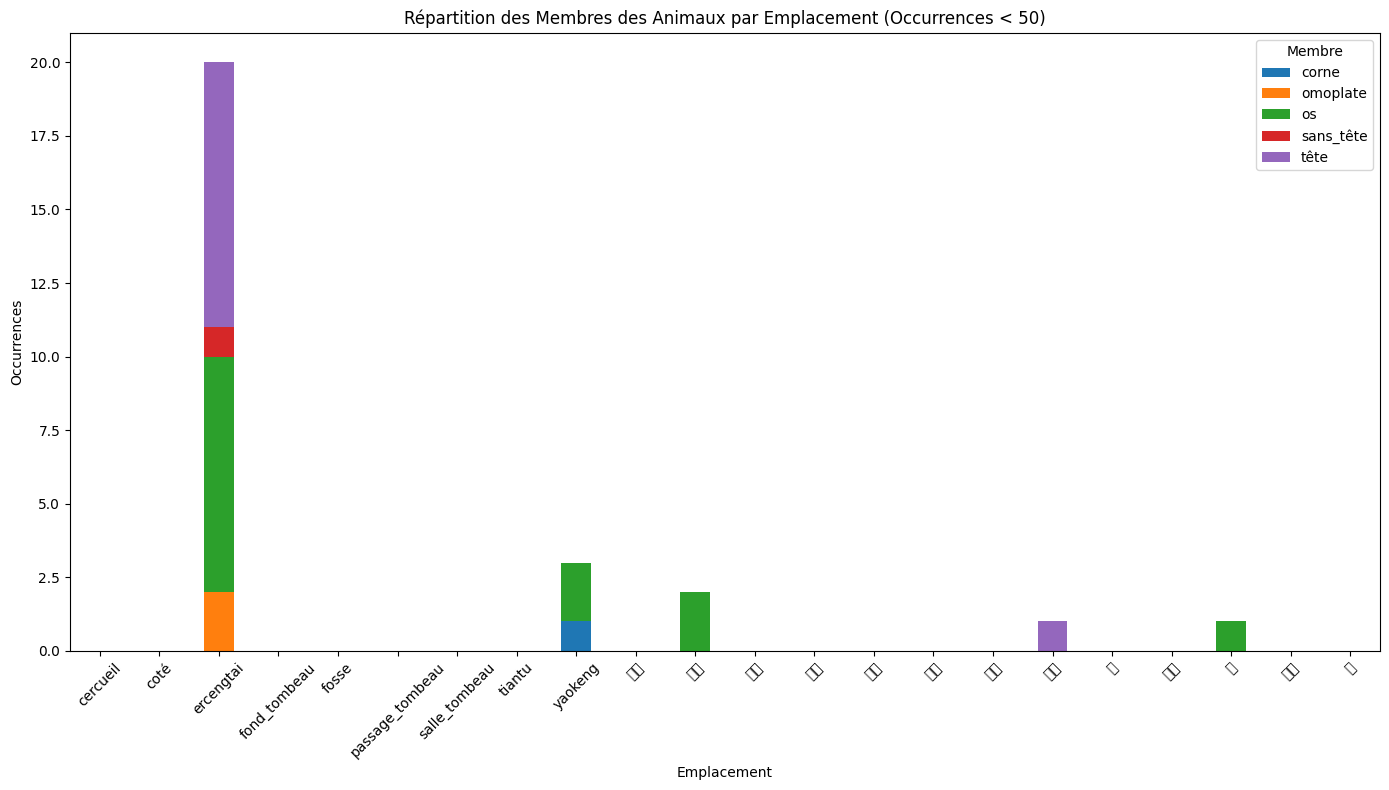

In [ ]:
# Calculer la somme des occurrences pour chaque membre
total_occurrences_per_member = pivot_table_global.sum(axis=0)

# Filtrer les membres avec moins de 200 occurrences
members_below_200 = total_occurrences_per_member[total_occurrences_per_member < 50].index

# Filtrer le tableau croisé dynamique pour inclure seulement les membres avec moins de 200 occurrences
filtered_pivot_table = pivot_table_global[members_below_200]

# Afficher le tableau croisé dynamique filtré
print(filtered_pivot_table)

# Créer un graphique en barres global pour les membres avec moins de 200 occurrences
filtered_pivot_table.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Répartition des Membres des Animaux par Emplacement (Occurrences < 50)')
plt.xlabel('Emplacement')
plt.ylabel('Occurrences')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


     periode          site  Type Animal        Membre
0        NaN   Yinxu_ouest  animal_part        entier
1        NaN   Yinxu_ouest  animal_part  articulation
11       4.0  Renjiazhuang  animal_part          tête
102      NaN       Sipanmo  animal_part        membre
120      NaN      Dasikong  animal_part        membre


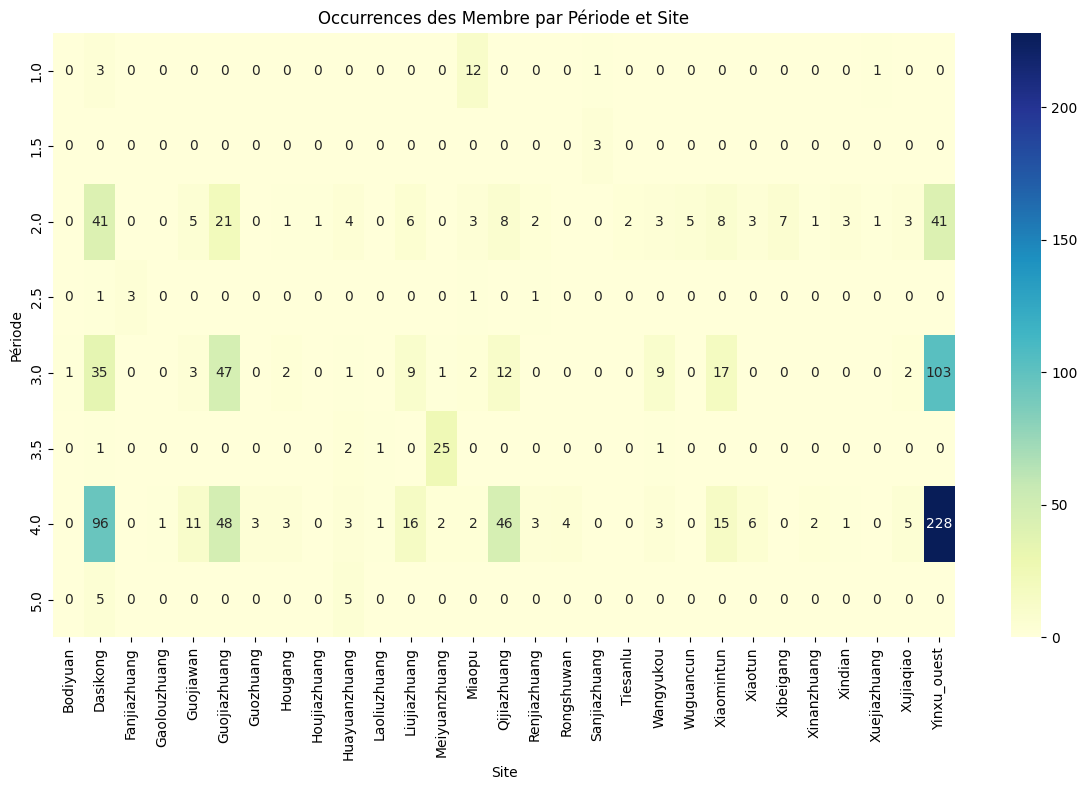

In [ ]:
# Liste des colonnes d'emplacements
cols_emp = ["animal_part", "chien_part", "bovin_part", "ovin_part", "cheval_part",
                    "porc_part", "volaille_part", "cervide_part", "poisson_part",
                    "singe_part", "renard_part", "lapin_part", "elephant_part"]

# Réorganiser le DataFrame pour avoir une seule colonne d'emplacement
df_melted = df.melt(id_vars=['periode', 'site'], value_vars=cols_emp,
                    var_name='Type Animal', value_name='Membre')


# Filtrer les lignes où l'emplacement n'est pas manquant
df_melted = df_melted.dropna(subset=['Membre'])


# Afficher un aperçu des données réorganisées
print(df_melted.head())
# Créer un tableau croisé dynamique pour compter les occurrences par période et site
pivot_period_location = pd.pivot_table(df_melted, values='Membre', index='periode', columns='site', aggfunc='size', fill_value=0)


# Créer la heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_period_location, cmap="YlGnBu", annot=True, fmt="d")
plt.title('Occurrences des Membre par Période et Site')
plt.xlabel('Site')
plt.ylabel('Période')
plt.tight_layout()
plt.show()
